<a href="https://colab.research.google.com/github/Sajeenafiza/ML-capstone/blob/main/ML_capstone_minefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Project done by**- Sajeena T R


# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, ratings, and user reviews.

The initial phase of this project involved rigorous data cleaning and preprocessing to ensure the data's suitability for comprehensive analysis. Then conducted the Exploratory Data Analysis (EDA) on both datasets, providing insights into the dataset's composition and features.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included  cuisines, average cost and average rating. The number of clusters was determined by utilizing the elbow method.

Then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral.

The outcome of the analysis revealed that the restaurants within the city were grouped into ten clusters based on their cuisines and average cost. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

https://github.com/Sajeenafiza/ML-capstone

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency


import string
import re
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import roc_auc_score,roc_curve,  accuracy_score,silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score,recall_score

from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from textblob import TextBlob


from tabulate import tabulate
import itertools

### Dataset Loading

In [ ]:
# Load Dataset
hotel_df=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# hotel  data
hotel_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# review data
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# rows&columns of hotel data
print("The rows and columns for restaurant data:")
print(hotel_df.shape)

The rows and columns for restaurant data:
(105, 6)


In [ ]:
# Dataset Rows & Columns count
# rows&columns of review data
print("The rows and columns for review data:")
review_df.shape

The rows and columns for review data:


(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info
# data types and non-null objects of hotel data
print("Restaurant info:")
print()
hotel_df.info()

Restaurant info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Dataset Info
# data types and non-null objects of review data
print("Review info:")
print()
review_df.info()

Review info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("The duplicate value for restaurant data: ",hotel_df.duplicated().sum())


The duplicate value for restaurant data:  0


In [ ]:
# Dataset Duplicate Value Count
print("The duplicate value for review data: ",review_df.duplicated().sum())

print("The duplicate values are:\n")
review_df[review_df.duplicated()]

The duplicate value for review data:  36
The duplicate values are:



Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values in restaurant data:\n")
hotel_df.isnull().sum()

Missing values in restaurant data:



Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Missing Values/Null Values Count
print("Missing values in review data:\n")
review_df.isnull().sum()

Missing values in review data:



Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

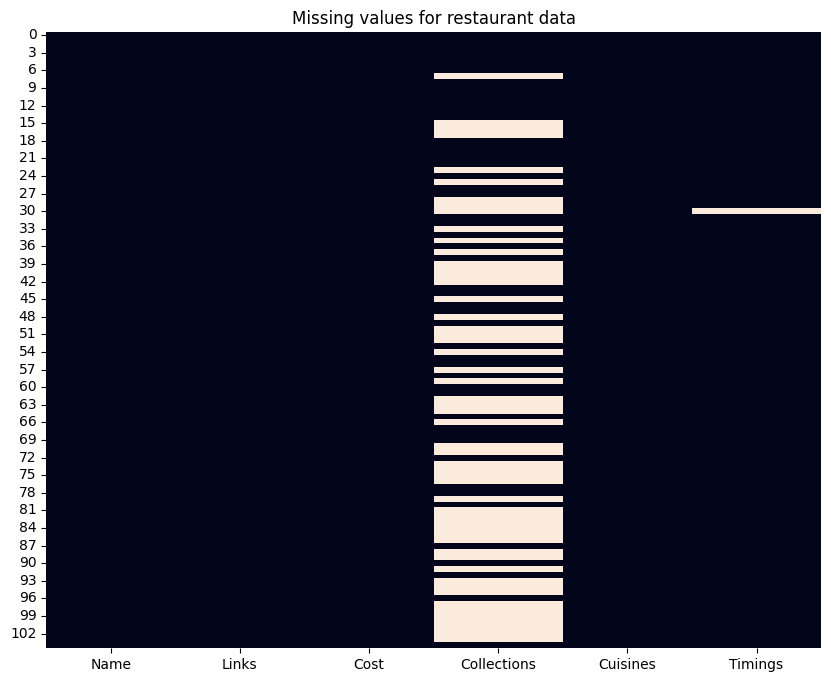

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(hotel_df.isnull(),cbar=False)
plt.title("Missing values for restaurant data")
plt.show()

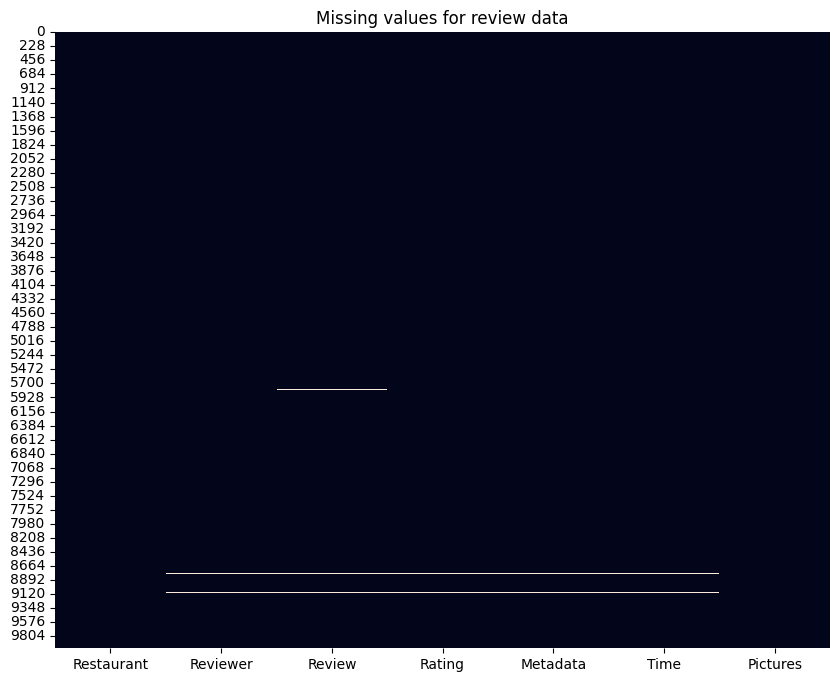

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(review_df.isnull(),cbar=False)
plt.title("Missing values for review data")
plt.show()

### What did you know about your dataset?

**Restaurant data**

This dataset consists of information about 105 restaurants with 6 features.

Datatypes of all the columns is string object.

No duplicate values are present.

Contains 54 missing values in Collections column and 1 missing value in Timings column.


**Review data**

This dataset consists of information about 10000 reviews about the 105 restaurants with 7 features.

Datatypes of all the columns is string object except Pictures.

Contains 36 duplicate values.

All the columns contain  missing values except  Restaurant and Pictures column.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("The features in the restaurant data: \n")
print(hotel_df.columns)
print()
print("The features in the review data: \n")
print(review_df.columns)

The features in the restaurant data: 

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

The features in the review data: 

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
# summary of dataset
print("Summary of restaurant data:\n")
hotel_df.describe()

Summary of restaurant data:



Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [ ]:
# summary of dataset
print("Summary of review data:\n")
review_df.describe()

Summary of review data:



Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

### Variables Description

**Restaurant Data:**


*   Name: Name of Restaurants
*   Links: URL Links of Restaurants
*   Cost: Per person estimated cost of dining
*   Collection: Tagging of Restaurants w.r.t. Zomato categories
*   Cuisines: Cuisines served by restaurants
*   Timings: Restaurant timings


**Review Data:**

*   Reviewer: Name of the reviewer
*   Review: Review text
*   Rating: Rating provided
*   MetaData: Reviewer metadata - Number of reviews and followers
*   Time: Date and Time of Review
*   Pictures: Number of pictures posted with review


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# unique values for restaurant data
print("Unique values for restaurant data\n")
for val in hotel_df.columns.to_list():
  print("Unique values for" , val,hotel_df[val].nunique())

print()
# unique values for review data
print("Unique values for review  data\n")
for val in review_df.columns.to_list():
  print("Unique values for" , val,review_df[val].nunique())

Unique values for restaurant data

Unique values for Name 105
Unique values for Links 105
Unique values for Cost 29
Unique values for Collections 42
Unique values for Cuisines 92
Unique values for Timings 77

Unique values for review  data

Unique values for Restaurant 100
Unique values for Reviewer 7446
Unique values for Review 9364
Unique values for Rating 10
Unique values for Metadata 2477
Unique values for Time 9782
Unique values for Pictures 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# making copies of the restaurant and review datasets
hotel=hotel_df.copy()
review=review_df.copy()

###Removing duplicates

In [ ]:
# removing the duplicates in review data
review.drop_duplicates(inplace=True)

# checking for duplicates value
review.duplicated().sum()

0

In [ ]:
review.shape,hotel.shape

((9964, 7), (105, 6))

###Handling missing values

In [ ]:
# handling missing value in Restaurant data

# percentage of null values in collections column
(hotel['Collections'].isnull().sum()/len(hotel))*100

51.42857142857142

51% of values are null in the Collections column.So we can drop Collections column.

In [ ]:
# dropping the Collections column
hotel.drop('Collections',axis=1,inplace=True)

In [ ]:
# the number of features reduced from 6 to 5
hotel.shape

(105, 5)

In [ ]:
# only one value is missing in the Timings column.So dropping that value
hotel.dropna(inplace=True)

In [ ]:
# handling missing value in Review data

review.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [ ]:
# only few na values are in some columns.So dropping that columns
review.dropna(inplace=True)

In [ ]:
# all the null values are removed in both dataset
print("Null values in restaurant data\n",review.isnull().sum())
print("Null values in review data\n",hotel.isnull().sum())

Null values in restaurant data
 Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64
Null values in review data
 Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64


###Datatype conversion

In [ ]:
# checking the datatypes
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [ ]:
# the datatype for "Cost" feature is string.Convert that to int
hotel['Cost']=hotel['Cost'].str.replace(',','').astype(int)

In [ ]:
# datatype of Cost column changed to int
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    int64 
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.9+ KB


In [ ]:
# estimated cost is in the range of Rs.150 and Rs.2800
hotel['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  700,  900, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [ ]:
# max cost is 2800 and min is 150
hotel.Cost.describe()

count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [ ]:
# extracting individual cuisines, and then creating a set of unique cuisines.

# creates a new column 'cuisine_list'
hotel['cuisine_list']=hotel['Cuisines'].apply(lambda x: x.replace(' ','').split(','))

# initializes the empty set
cuisine=set()

# iterates through the 'cuisine_list' column and  updates the 'cuisine' set by adding all the cuisines present in each list
for cus in hotel.cuisine_list:
  cuisine.update(cus)

print("Unique cuisines:", cuisine)
print("The no. of unique cuisines:",len(cuisine))



Unique cuisines: {'Chinese', 'BBQ', 'Momos', 'Hyderabadi', 'American', 'Mithai', 'Malaysian', 'Asian', 'Indonesian', 'Italian', 'Japanese', 'FastFood', 'Thai', 'IceCream', 'Biryani', 'Spanish', 'Continental', 'Arabian', 'Seafood', 'Lebanese', 'Salad', 'ModernIndian', 'NorthIndian', 'Cafe', 'StreetFood', 'Mexican', 'Goan', 'Beverages', 'HealthyFood', 'Juices', 'Wraps', 'Kebab', 'Sushi', 'Mughlai', 'Desserts', 'Burger', 'Mediterranean', 'NorthEastern', 'SouthIndian', 'FingerFood', 'Pizza', 'Andhra', 'European', 'Bakery'}
The no. of unique cuisines: 44


In [ ]:
# checking the datatypes for the review data
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [ ]:
# datatype for rating is string.so we have to convert this to float

# unique values for Rating columns
review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
# no. of 'Like' values
review['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
#converts the 'Rating' column to numeric type. The parameter errors='coerce' tells pandas to convert any values that cannot be parsed as numbers to NaN instead of raising an error.
review['Rating']=pd.to_numeric(review['Rating'],errors='coerce')

In [ ]:
# fills the NaN values in the 'Rating' column with the median of the non-NaN values.
review['Rating'].fillna(review['Rating'].median(),inplace=True)

In [ ]:
# datatype of Rating column changed to float
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Time        9955 non-null   object 
 6   Pictures    9955 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.2+ KB


In [ ]:
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[9955 rows x 7 columns]

In [ ]:
#extracting details from Metadata column

# splitting the Metadata column to two columns 'Total_review' and 'Total_followers'
review['Total_review'],review['Total_followers']=review['Metadata'].str.split(',').str


# converting the values to numeric type
review['Total_review']=pd.to_numeric(review['Total_review'].str.split(' ').str[0])  #after splitting first part will be Total_review
review['Total_followers']=pd.to_numeric(review['Total_followers'].str.split(' ').str[1]) #after splitting second part will be Total_followers

In [ ]:
#extracting details from Time column

# converts the 'Time' column to a datetime data type
review['Time']=pd.to_datetime(review['Time'])

#  extracts the year component from the datetime objects
review['review_Year']=pd.DatetimeIndex(review['Time']).year

#  extracts the month component from the datetime objects
review['review_month']=pd.DatetimeIndex(review['Time']).month

#  extracts the hour component from the datetime objects
review['review_hour']=pd.DatetimeIndex(review['Time']).hour

# three new columns 'review_Year','review_month' and 'review_hour' are created


In [ ]:
# removing the Metadata column
review.drop('Metadata',axis=1,inplace=True)

In [ ]:
# merging the two dataframes hotel and review
df_merge=pd.merge(hotel[['Name','Cost','cuisine_list']],review,left_on='Name',right_on='Restaurant')
df_merge

Name  Cost  \
0      Beyond Flavours   800   
1      Beyond Flavours   800   
2      Beyond Flavours   800   
3      Beyond Flavours   800   
4      Beyond Flavours   800   
...                ...   ...   
9850  Chinese Pavilion  1000   
9851  Chinese Pavilion  1000   
9852  Chinese Pavilion  1000   
9853  Chinese Pavilion  1000   
9854  Chinese Pavilion  1000   

                                           cuisine_list        Restaurant  \
0     [Chinese, Continental, Kebab, European, SouthI...   Beyond Flavours   
1     [Chinese, Continental, Kebab, European, SouthI...   Beyond Flavours   
2     [Chinese, Continental, Kebab, European, SouthI...   Beyond Flavours   
3     [Chinese, Continental, Kebab, European, SouthI...   Beyond Flavours   
4     [Chinese, Continental, Kebab, European, SouthI...   Beyond Flavours   
...                                                 ...               ...   
9850                                 [Chinese, Seafood]  Chinese Pavilion   
9851                                 [Chinese, Seafood]  Chinese Pavilion   
9852                                 [Chinese, Seafood]  Chinese Pavilion   
9853                                 [Chinese, Seafood]  Chinese Pavilion   
9854                                 [Chinese, Seafood]  Chinese Pavilion   

                  Reviewer                                             Review  \
0        Rusha Chakraborty  The ambience was good, food was quite good . h...   
1     Anusha Tirumalaneedi  Ambience is too good for a pleasant evening. S...   
2          Ashok Shekhawat  A must try.. great food great ambience. Thnx f...   
3           Swapnil Sarkar  Soumen das and Arun was a great guy. Only beca...   
4                   Dileep  Food is good.we ordered Kodi drumsticks and ba...   
...                    ...                                                ...   
9850      Abhishek Mahajan  Madhumathi Mahajan Well to start with nice cou...   
9851        Sharad Agrawal  This place has never disappointed us.. The foo...   
9852             Ramandeep  Bad rating is mainly because of "Chicken Bone ...   
9853       Nayana Shanbhag  I personally love and prefer Chinese Food. Had...   
9854      Bhargava Krishna  Checked in here to try some delicious chinese ...   

      Rating                Time  Pictures  Total_review  Total_followers  \
0        5.0 2019-05-25 15:54:00         0             1              2.0   
1        5.0 2019-05-25 14:20:00         0             3              2.0   
2        5.0 2019-05-24 22:54:00         0             2              3.0   
3        5.0 2019-05-24 22:11:00         0             1              1.0   
4        5.0 2019-05-24 21:37:00         0             3              2.0   
...      ...                 ...       ...           ...              ...   
9850     3.0 2016-06-05 00:08:00         0            53             54.0   
9851     4.5 2016-06-04 22:01:00         0             2             53.0   
9852     1.5 2016-06-03 10:37:00         3            65            423.0   
9853     4.0 2016-05-31 17:22:00         0            13            144.0   
9854     3.5 2016-05-31 16:41:00         6           472           1302.0   

      review_Year  review_month  review_hour  
0            2019             5           15  
1            2019             5           14  
2            2019             5           22  
3            2019             5           22  
4            2019             5           21  
...           ...           ...          ...  
9850         2016             6            0  
9851         2016             6           22  
9852         2016             6           10  
9853         2016             5           17  
9854         2016             5           16  

[9855 rows x 14 columns]

### What all manipulations have you done and insights you found?


**Restaurant data**

*   51% of values are null in the Collections column.So  
     dropped  Collections column.Dropped the missing value in the Timings column.

*  Converted the datatype of "Cost" feature into int.

*  Extracted cuisines from the Cuisines column.


*   Estimated cost of dining of all restaurants are  in the range of
     Rs. 150 and Rs.2800

*   There are 44 unique cuisines across 104 restaurants.

**Review data**

*   Removed the duplicate values and null values.

*   Converted the datatype of "rating" feature from object to float for precise analysis.

*   Split the Metadata column to two new columns 'Total_review' and 'Total_followers' and converted the data type into int and float.
*   Extracted year,month and hour components from Time column and converted the datatype to datetime.


Finally combined the two dataframes hotel and review and stored it in a variable df_merge.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##Univariate analysis

### Distribution of Cost and Rating

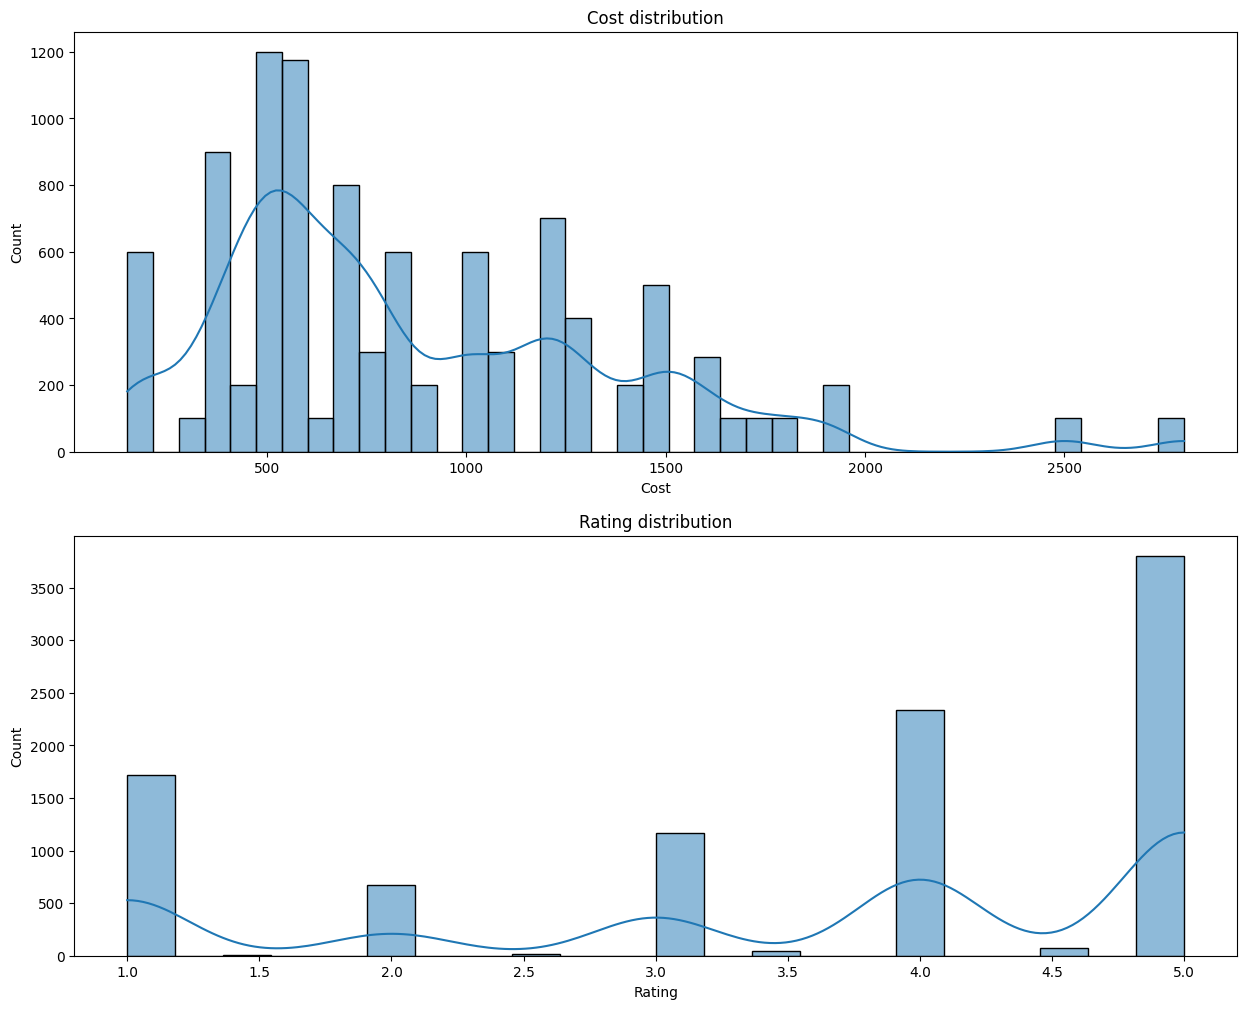

In [ ]:
# Chart - 1 visualization code
# cost distribution plotting
fig,ax=plt.subplots(2,1,figsize=(15,12))
sns.histplot(df_merge['Cost'],ax=ax[0],kde=True) #using the histplot for cost
ax[0].set_title("Cost distribution")          #title

# Rating distribution plotting
sns.histplot(df_merge['Rating'],ax=ax[1],kde=True) #using the histplot for Rating
ax[1].set_title("Rating distribution")             #title
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of the data. By looking at the shape of the histograms, we can quickly assess whether the data is normally distributed or  skewed. The mean std can be visually estimated from the histograms.

##### 2. What is/are the insight(s) found from the chart?



*   Cost distribution shows skewness.The most common  per person estimated
     cost of dining at the restaurant is around Rs.500.

*   We can see two peaks in the Rating distribution at 4 and 5 indicating a       majority of postitive ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Insights gained from the cost and rating distributions can indeed have a
positive impact on the business.

* Knowing that the most common per person estimated cost of dining at the restaurant is around Rs. 500 allows the business to optimize its pricing strategy. They can adjust menu prices to align with this price point.  This can attract more diners and increase overall revenue.

*  Positive ratings indicate satisfied customers. This positive perception can enhance the restaurant's reputation on Zomato, attracting more customers and fostering loyalty among existing ones.


These insights also lead to negative growth.

*   If the restaurant relies heavily on a Rs. 500 price point but faces increasing cost pressures, maintaining profitability may become challenging without adjusting prices.
*  Maintaining consistent quality across all aspects of the dining experience is crucial for sustaining positive ratings. If there are inconsistencies in food quality or service,  it can lead to negative reviews.

#### Chart - 2

###Most popular cuisines

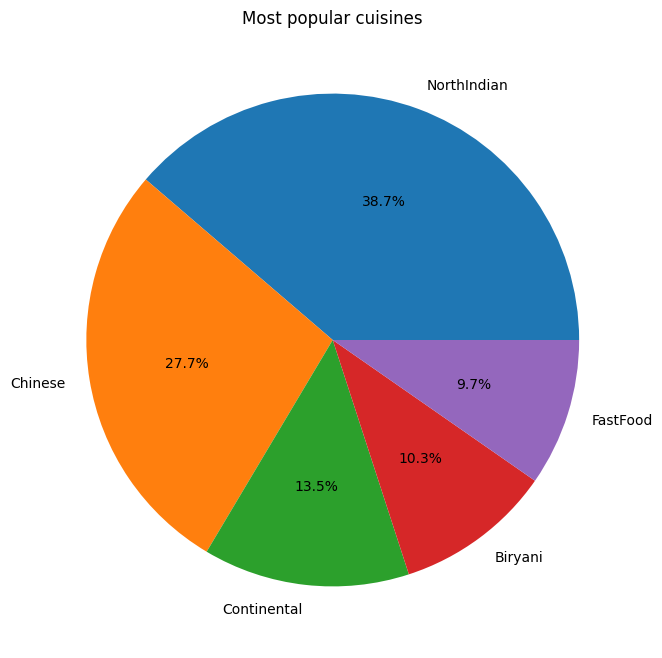

In [ ]:
# Chart - 2 visualization code
#finding the number of cuisines in all restaurants

# initializing an empty list
cuisine_res=[]
# iterating the cuisine_list and appending the cuisine name to the empty list
for cuisi in hotel.cuisine_list:
  for  cui in cuisi:
    cuisine_res.append(cui)

# converting the list of cuisines to series and finding the value_counts
cuisine_count=pd.Series(cuisine_res).value_counts()

# top 5 cuisines
cuisine_counts=cuisine_count.head(5)
# plotting the pie plot
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')

plt.title("Most popular cuisines")    #title
plt.show()


##### 1. Why did you pick the specific chart?

 Pie charts are effective for showing proportions or percentages of a whole. In this case, we are interested in understanding the proportion of each cuisine type relative to the total count of cuisines. Pie charts make it easy to compare the relative sizes of different categories.

##### 2. What is/are the insight(s) found from the chart?

The most popular cuisine is North Indian food followed by Chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the significant portion of customers are searching for North Indian food, Zomato could focus on adding more North Indian restaurants to its platform and promoting them to customers.The restaurant can allocate more resources to sourcing high-quality ingredients, hiring skilled chefs, and developing innovative dishes in the North Indian food category to meet customer demand.Similary hotels can offer diverse menu in Chinese category also. Satisfied customers are more likely to leave positive reviews on platforms like Zomato, which can attract new customers and improve the restaurant's overall rating and reputation.

Relying too heavily on North Indian and Chinese cuisines could lead to a lack of diversity in the menu offerings. It's important for Zomato to consider other customers when making strategic decisions.

#### Chart - 3

###Top5 most engaged restaurants and least engaged restaurants

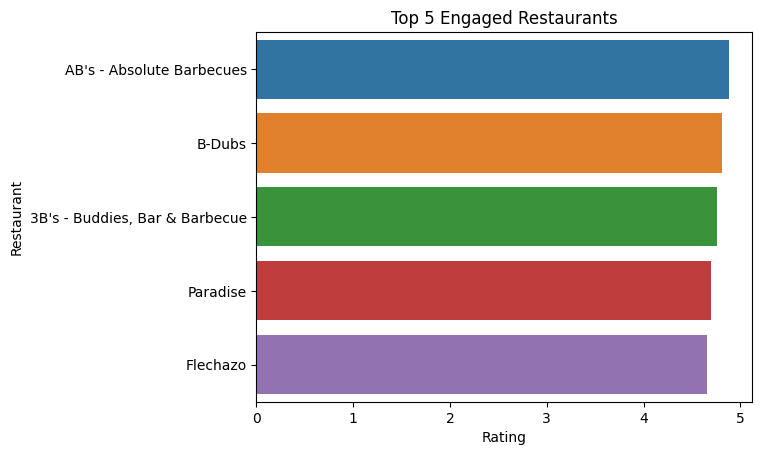

In [ ]:
# finding the restaurants with the most average rating
rate_range = df_merge.groupby('Restaurant').agg({'Rating':'mean'}).reset_index()

# top5 restaurants
rate_range.sort_values('Rating',ascending=False).head(5)
# plotting the bar graph
sns.barplot(rate_range.sort_values('Rating',ascending=False).head(5), x = 'Rating', y = 'Restaurant',hue='Restaurant')
plt.title('Top 5 Engaged Restaurants')
plt.show()

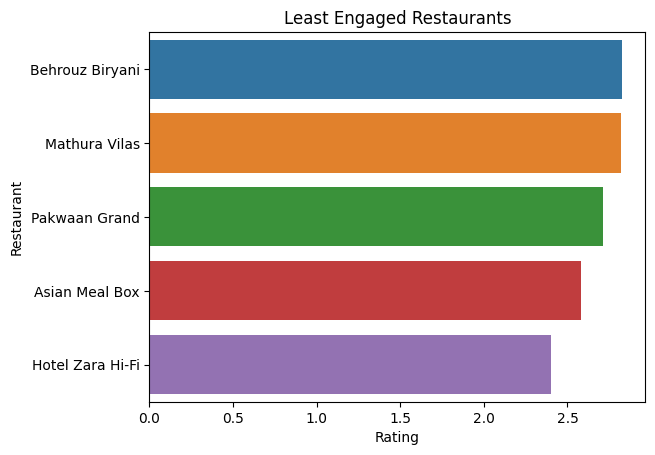

In [ ]:
 # finding the restaurants with the least average rating
sns.barplot(rate_range.sort_values('Rating',ascending=False).tail(5), x = 'Rating', y = 'Restaurant',hue='Restaurant')
plt.title('Least Engaged Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph is used for plotting the above graph because it shows frequency levels for different category.

##### 2. What is/are the insight(s) found from the chart?

AB's-Absolute Barbecues, shows maximum engagement as it has maximum   average rating  and Hotel Zara Hi-Fi shows lowest engagement as it has lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

AB's - Absolute Barbecues, with its high average rating and maximum engagement, can leverage this positive reputation to attract more customers. Positive reviews and high ratings on platforms like Zomato can serve as powerful marketing tools, influencing potential diners to choose AB's over competitors.

Some restaurant show less rating which can show negative growth.

#### Chart - 4

##Bivariate

###Top 5 expensive and affordable restaurants

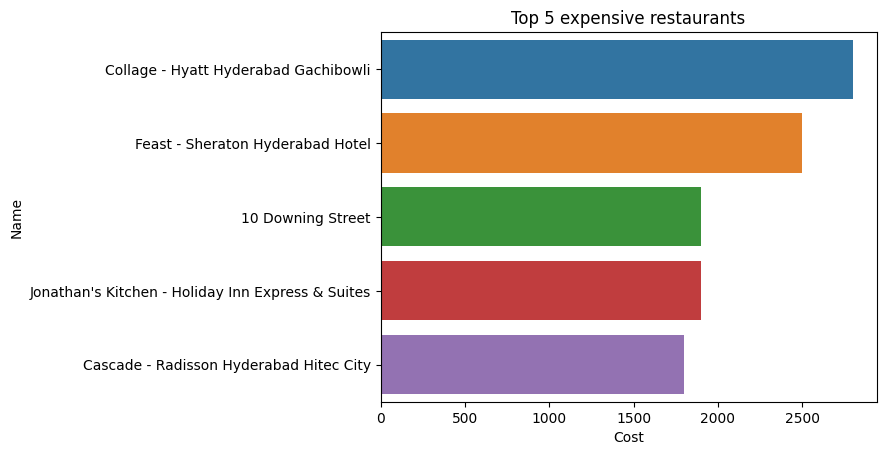

In [ ]:
# Chart - 4 visualization code
# sorting the hotels w.r.t cost
hotel_cost = hotel.sort_values('Cost', ascending = False)[['Name','Cost']]

# plotting the bar graph
sns.barplot(data = hotel_cost.head(5), x = "Cost", y='Name', hue='Name')
plt.title('Top 5 expensive restaurants')
plt.show()

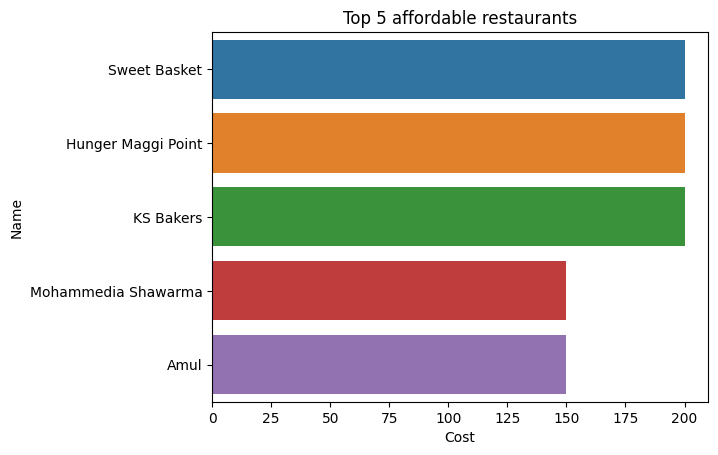

In [ ]:
# plotting the 5 affordable hotels with the bar graph
sns.barplot(data = hotel_cost.tail(5), x = "Cost", y='Name', hue='Name')
plt.title('Top 5 affordable restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar graph allows for easy comparison between different restaurants in terms of their cost.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that, Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant in the locality which has a price of 2800 for order.

Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While Collage-Hyatt Hyderabad may cater to upscale customers, Amul and Mohammedia Shawarma can attract budget-conscious diners with their lower prices. This diversification in pricing can help capture a broader customer base.Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.

Restaurants like Amul and Mohammedia Shawarma, with their lower prices, may put competitive pressure on Collage - Hyatt Hyderabad Gachibowli. If customers perceive similar value in the dining experiences offered by these less expensive options, they may choose to dine there instead, leading to a loss of customers and revenue for Collage.

#### Chart - 5

###Most followed reviewer

In [ ]:
# finding the most followed reviewer

top_reviewers= review.groupby('Reviewer').agg({'Total_review':'max','Total_followers':'max',
              'Rating':'mean'}).reset_index().rename(columns = {'Rating':'avg_rating'})
# finding the top 5 reviewers with most no. of followers
top_review_followers=top_reviewers.sort_values('Total_followers', ascending = False).head(5)

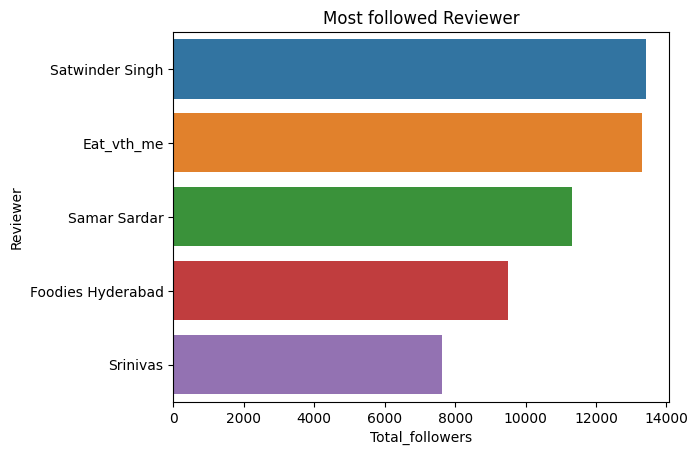

In [ ]:
# Chart - 5 visualization code
# visualization code for most followed reviewer
sns.barplot(data =top_review_followers , x = 'Total_followers',
            y = 'Reviewer',hue='Reviewer')
plt.title('Most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph allows for easy comparison between different reviewers in terms of their follower counts

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that, Satwinder Singh and Eat_vth_me are the top two reviewers with the largest number of followers,indicating that their reviews have the potential to influence a larger audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a large number of followers, Zomato could focus on promoting their reviews to customers.Positive reviews and recommendations from influential reviewers like Satwinder Singh and Eat_vth_me can serve as powerful endorsements for businesses.

This dependency can be risky, as negative reviews or a loss of interest from these reviewers could negatively impact the business's reputation and growth.

#### Chart - 6

###Reviewers with most review

In [ ]:
# finding the reviewers with most review
top_review_max=top_reviewers.sort_values('Total_review', ascending = False).head(5)

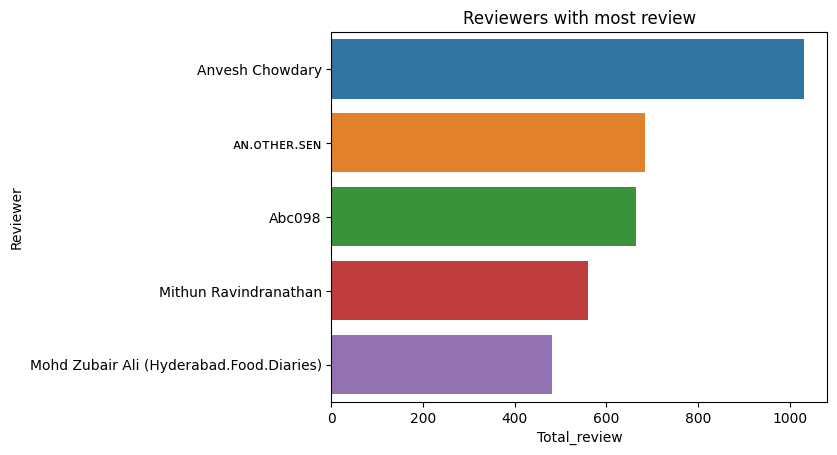

In [ ]:
# Chart - 6 visualization code
# visualization code for finding the reviewers with most review
sns.barplot(data =top_review_max , x = 'Total_review',
            y = 'Reviewer',hue='Reviewer')
plt.title('Reviewers with most review')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph allows for easy comparison between different reviewers in terms of the number of reviews they have written.

##### 2. What is/are the insight(s) found from the chart?

Anvesh Chowdary and AN.OTHER.SEN are the top 2 reviewers in terms of the number of reviews they have written.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The large number of reviews written by Anvesh Chowdary and AN.OTHER.SEN can serve as social proof for businesses.Their reviews can increase the visibility of businesses.

 Their opinions may not always be unbiased. Businesses may face negative growth if customers perceive reviews from these reviewers  as biased or untrustworthy, leading to a loss of credibility and trust in the business.

#### Chart - 7

###Average Ratings given by most followed Reviewer

In [ ]:
# finding the reviewers with high avg rating a

top_review_avg=review.groupby('Reviewer')[['Rating', 'Total_followers']].mean()
avg_rate=top_review_avg.sort_values('Total_followers', ascending=False).head(5)

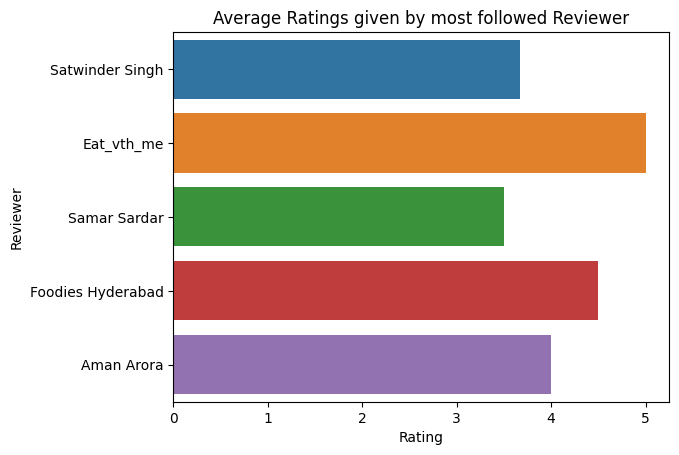

In [ ]:
# Chart - 7 visualization code
# visualization code for finding the average Ratings given by most followed Reviewer
sns.barplot(data =avg_rate , x = 'Rating',y = 'Reviewer',hue='Reviewer')
plt.title('Average Ratings given by most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph allows for easy comparison between different reviewers in terms of their average ratings.Each bar represents a reviewer, and the height of the bar corresponds to their average rating.

##### 2. What is/are the insight(s) found from the chart?

 Reviewers like 'eat_vth_me' has consistently given an average rating of 5 and Foodies Hyderabad has given 4.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistently high ratings from influential reviewers like 'eat_vth_me' can contribute to a positive reputation for the businesses they review.

Over-dependency on individual reviewers can be risky, as changes in their reviewing behavior or preferences could impact businesses' reputation and growth.

#### Chart - 8

###Variation of Rating with Cost

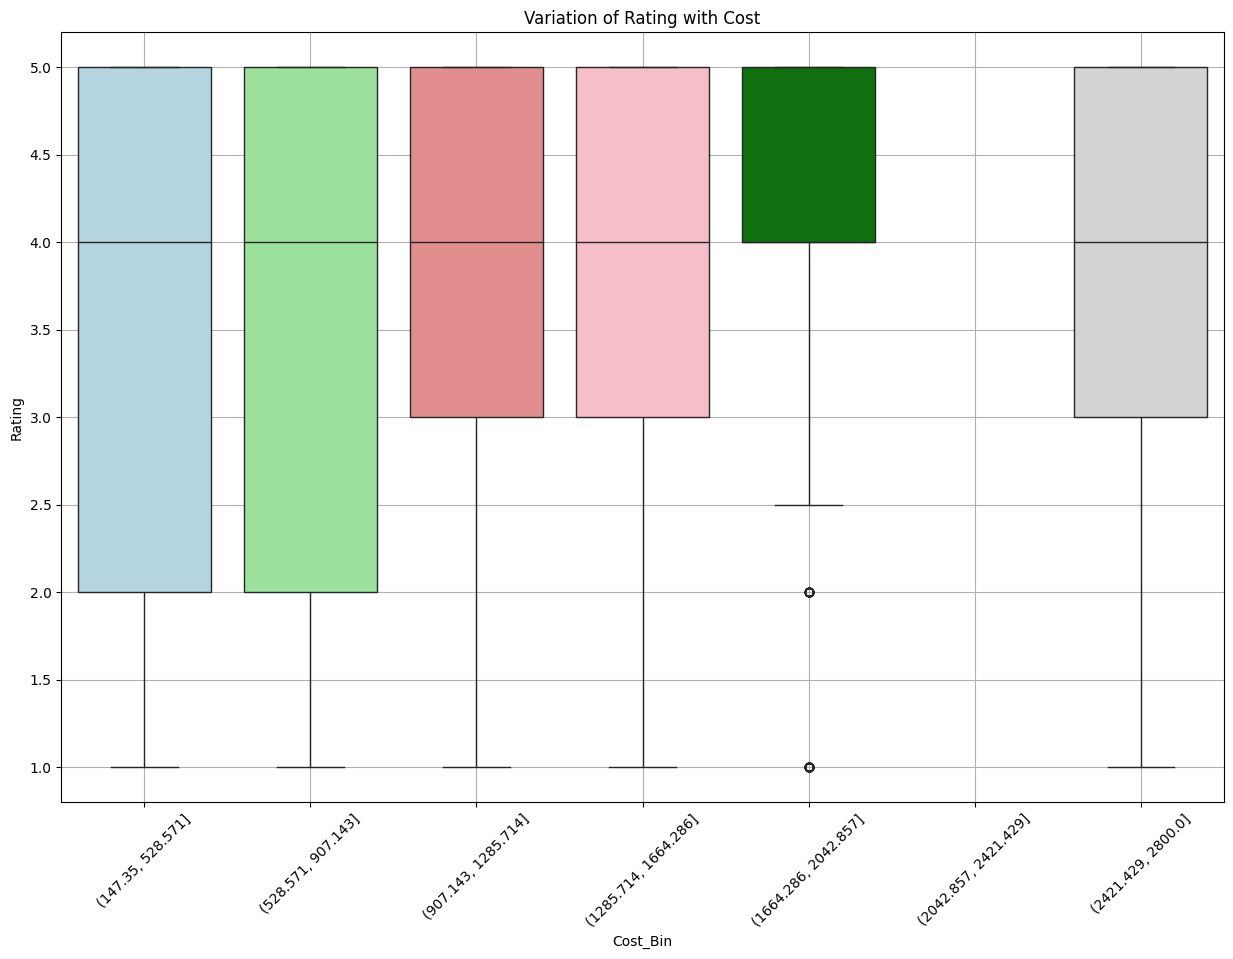

In [ ]:
# Chart - 8 visualization code

# Creating a box plot for variation of rating with cost
plt.figure(figsize=(15, 10))
# Create 7 bins for the 'Cost' column
df_merge['Cost_Bin'] = pd.cut(df_merge['Cost'], bins=7)

# boxplot with 'Cost_bin' in x axis and rating in y axis
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'green','lightyellow' , 'lightgrey']
sns.boxplot(x='Cost_Bin', y='Rating', data=df_merge,palette=colors)
plt.xticks(rotation=45)
plt.title('Variation of Rating with Cost')   #adding title
plt.grid(True)  # Adding grid lines for better visualization
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot allows you to compare the distribution of ratings across different cost ranges easily.Outliers are clearly identified in the boxplot. Outliers can indicate unusual or exceptional cases such as restaurants with exceptionally high or low ratings relative to their cost.

##### 2. What is/are the insight(s) found from the chart?

The highest cost bin [(2421, 2800)] shows the highest median rating, which could suggest that more expensive restaurants tend to receive better ratings, possibly due to quality, service, or experience.

The outliers indicates that there are some restaurants with ratings that are significantly lower than the typical range of ratings for their cost category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Higher ratings for more expensive restaurants may suggest to potential customers that these establishments offer superior quality, service, or overall dining experience.


Outliers, especially in the highest cost bin, suggest that high prices alone do not guarantee high ratings. Poor experiences at expensive restaurants may lead to significantly lower ratings due to higher customer expectations associated with higher costs.

#### Chart - 9

###Average Ratings by month and hour

In [ ]:
# finding the avg rating by month
monthly_avg_rating = review.groupby('review_month')['Rating'].mean()

# finding the avg rating by hour
hourly_avg_rating = review.groupby('review_hour')['Rating'].mean()

<Figure size 1200x1200 with 0 Axes>

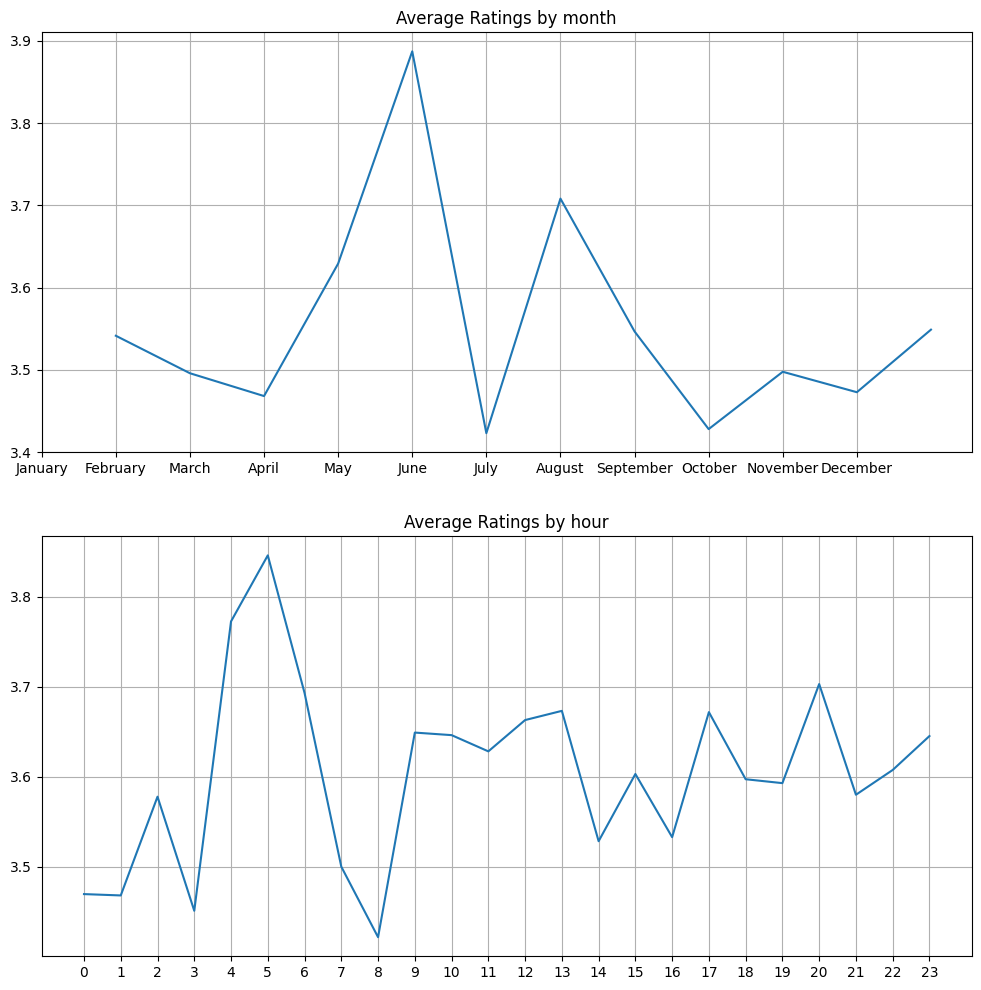

In [ ]:
# Chart - 9 visualization code
# plotting the line chart to show avg rating by month
plt.figure(figsize=(12,12))
fig,ax=plt.subplots(2,1,figsize=(12,12))
ax[0].plot(monthly_avg_rating)
# setting the month names for x labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax[0].set_xticks(range(len(month_names)))
ax[0].set_xticklabels(month_names)          # Set ticks at positions corresponding to the months
ax[0].set_title('Average Ratings by month')
ax[0].grid(True)

# plotting the hourly avg rating
ax[1].plot(hourly_avg_rating)
ax[1].set_xticks(range(0, 24))
ax[1].set_title('Average Ratings by hour')

ax[1].grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are effective for examining temporal trends, such as how average ratings vary over different months or hours of the day.Months and hours have a natural sequential order, making them well-suited for representation on the x-axis of a line chart.

##### 2. What is/are the insight(s) found from the chart?

There is a noticeable peak in June, indicating the highest average ratings occur in this month.
There are lower points, particularly in July and October, suggesting a potential seasonal impact on ratings.

There are peaks in the early hours (around 5 AM), mid-morning (around 9 AM), and late evening (around 8 PM).
There are noticeable dips in the late morning (around 7-8 AM) and evening (around 2-4 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

They can focus on promoting special offers, events, or menu items during peak months to capitalize on increased customer satisfaction and engagement.Understanding the patterns of peak and dip in ratings throughout the day allows businesses to optimize their operations and staffing.

Ignoring  the dips in ratings during specific periods could lead to negative growth if customer concerns or dissatisfaction during those times are not addressed promptly.

#### Chart - 10

###Top 10 reviews

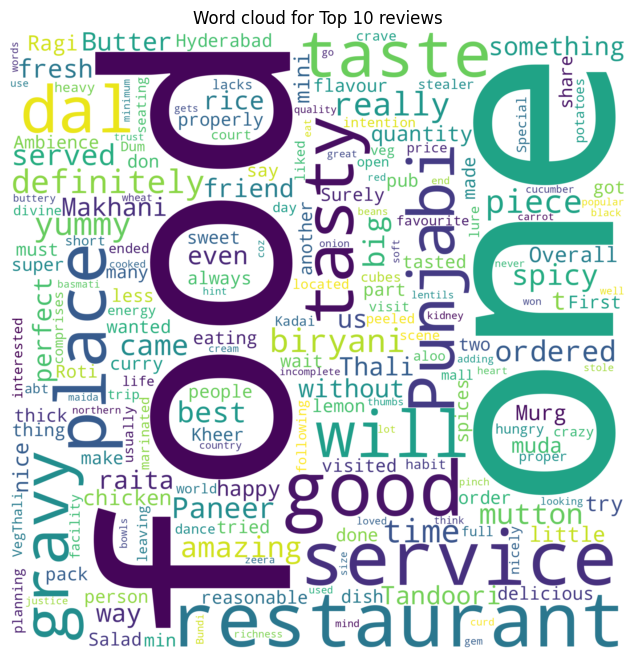

In [ ]:
# Chart - 10 visualization code
# Combine the top 10 reviews into a single text
text = " ".join(name for name in review.sort_values('Review', ascending=False).Review[:10])

# Create a WordCloud with specified parameters
word_cloud = WordCloud(
    width=2000,
    height=2000,
    collocations=False,
    background_color='white'
).generate(text)

 # Set up the plot
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud for Top 10 reviews")

# Display the Word Cloud
plt.show()


##### 1. Why did you pick the specific chart?

Creating a word cloud for the top 10 reviews can provide a visual representation of the most frequent words used in those reviews. This can be useful for quickly identifying common themes, sentiments, or topics that are prominent among the top-rated reviews.

##### 2. What is/are the insight(s) found from the chart?

The terms 'food','one', 'good,'service','tasty', 'restaurant' and 'place' are the most commonly occurring words in the reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing that terms like 'food,' 'good,' 'service,' and 'tasty' are frequently mentioned suggests that customers appreciate these aspects of the business.

#### Chart - 11

###Word cloud for negative reviews

In [ ]:
# Creating dataframes for positive and negative reviews
pos_rev = review[review.Rating>= 3]
neg_rev = review[review.Rating< 3]
neg_text=",".join(list(neg_rev['Review'].values))

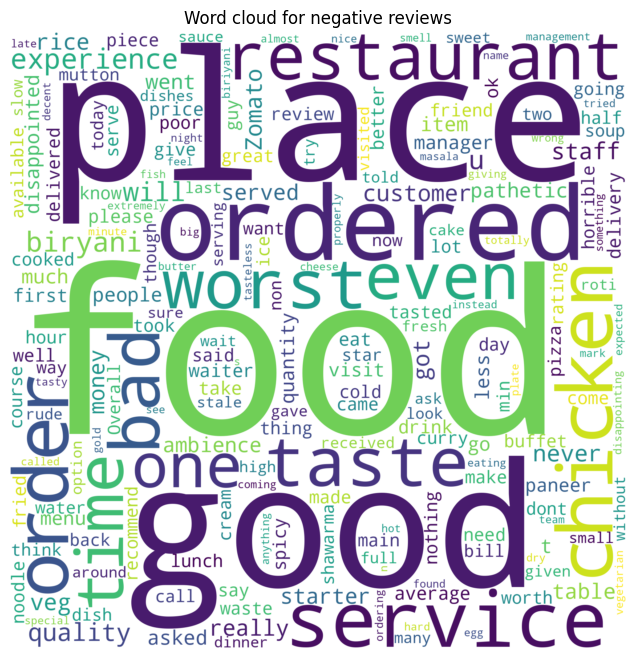

In [ ]:
# Chart - 11 visualization code
# Create a WordCloud with specified parameters
word_cloud = WordCloud(
    width=2000,
    height=2000,
    collocations=False,
    background_color='white'
).generate(neg_text)

 # Set up the plot
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud for negative reviews")

# Display the Word Cloud
plt.show()

##### 1. Why did you pick the specific chart?

Creating a word cloud for positive and negative  reviews can provide a visual representation of the most frequent words used in those reviews. This can be useful for quickly identifying common themes, sentiments, or topics that are prominent among the top-rated reviews.

##### 2. What is/are the insight(s) found from the chart?

The terms 'food', 'bad,'service','worst', 'pathetic' and 'chicken' are the most commonly occurring words in the negative reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding the specific pain points mentioned in reviews, such as 'worst' and 'pathetic' service, allows the business to target improvements in customer service processes.


#### Chart - 12

###Rating vs Review Length

In [ ]:
#  Creating a review_length column to check the frequency of each rating.
review['Review_length'] = review['Review'].apply(len)

In [ ]:
# Chart - 12 visualization code
# creating a scatter plot to plot the frequency of rating
fig = px.scatter(review, x=review['Rating'], y=review['Review_length'])
fig.update_layout(title_text="Rating vs Review Length")
fig.show()


##### 1. Why did you pick the specific chart?

Scatter plots can help visualize the distribution of reviews across different rating levels based on their length. This visualization can reveal patterns or trends in how review length varies with the sentiment conveyed by the rating.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot confirms that length of review doesn't impact ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that review length doesn't significantly impact ratings allows the business to focus its efforts on improving other aspects of its products or services that do influence customer satisfaction and ratings.

#### Chart - 13

###Top 10 Cuisines by Average Cost

In [ ]:
# Calculate the average cost per cuisine

# creating a series of cuisines and converts the Series into a DataFrame with the column name 'Cuisine'.
cuisine_cost = hotel['Cuisines'].str.split(', ').explode().to_frame(name='Cuisine')

# calculates the average cost per cuisine
cuisine_cost['Cost'] = hotel['Cost'] / hotel['Cuisines'].str.count(', ') + 1

# Group and calculate the average cost per cuisine
cuisine_avg_cost = cuisine_cost.groupby('Cuisine')['Cost'].mean()

# Exclude Lebanese cuisine as its value is inf
cuisine_avg_cost = cuisine_avg_cost[cuisine_avg_cost.index != 'Lebanese']

# Select the top 10 cuisines
top_10_cuisines = cuisine_avg_cost.nlargest(10)

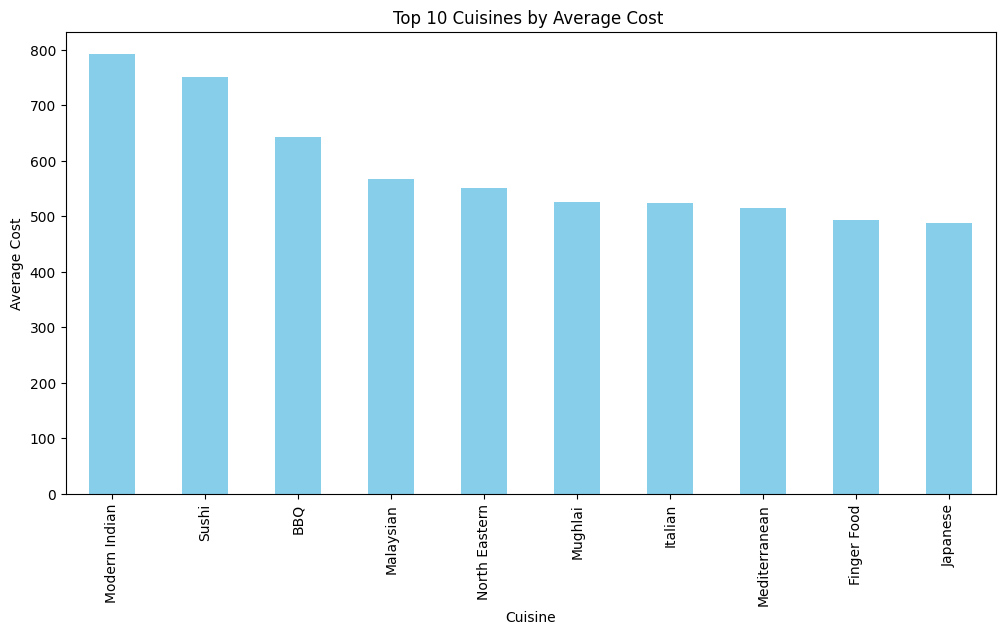

In [ ]:
# Chart - 13 visualization code

# Create a bar plot for the top 10 cuisines
plt.figure(figsize=(12, 6))
top_10_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Cost ')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots make it easy to compare the average costs of different cuisines side by side. Each bar represents a cuisine, and the height of the bar corresponds to the average cost.

##### 2. What is/are the insight(s) found from the chart?

It is clear that 'Modern Indian,' 'Sushi,' and 'BBQ' cuisines rank among the most expensive options in terms of cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By catering to the demand for these higher-cost cuisines, the business can potentially increase its revenue and profitability.

#### Chart - 14 - Correlation Heatmap

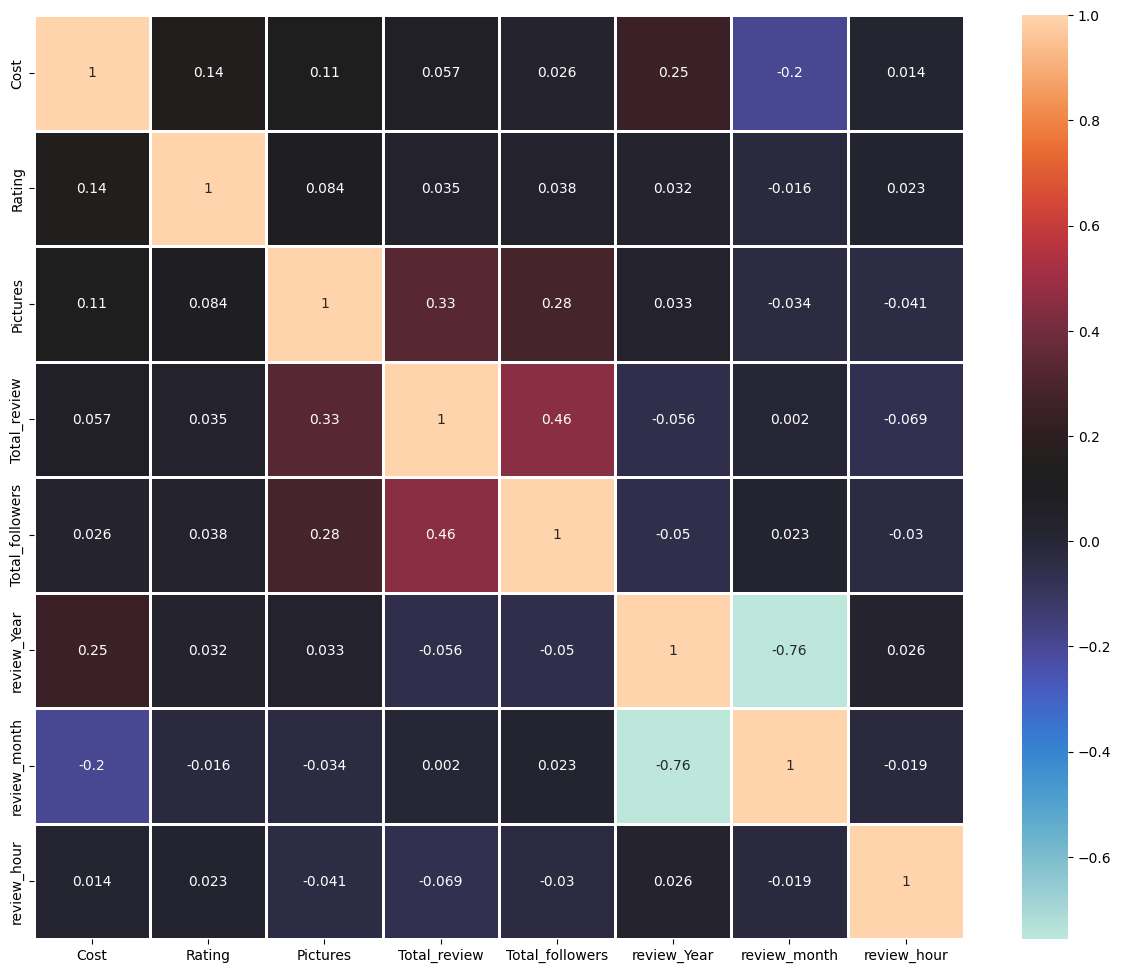

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df_merge.corr(),  annot=True, cmap='icefire', linewidths=1)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap provides a visual representation of correlation coefficients between pairs of variables.Each cell in the table shows the correlation between two variables.

##### 2. What is/are the insight(s) found from the chart?

From the heat map, we can see a strong relation between  Total_review and Total_followers.Also there is a negative relationship between cost and review_month.

#### Chart - 15 - Pair Plot

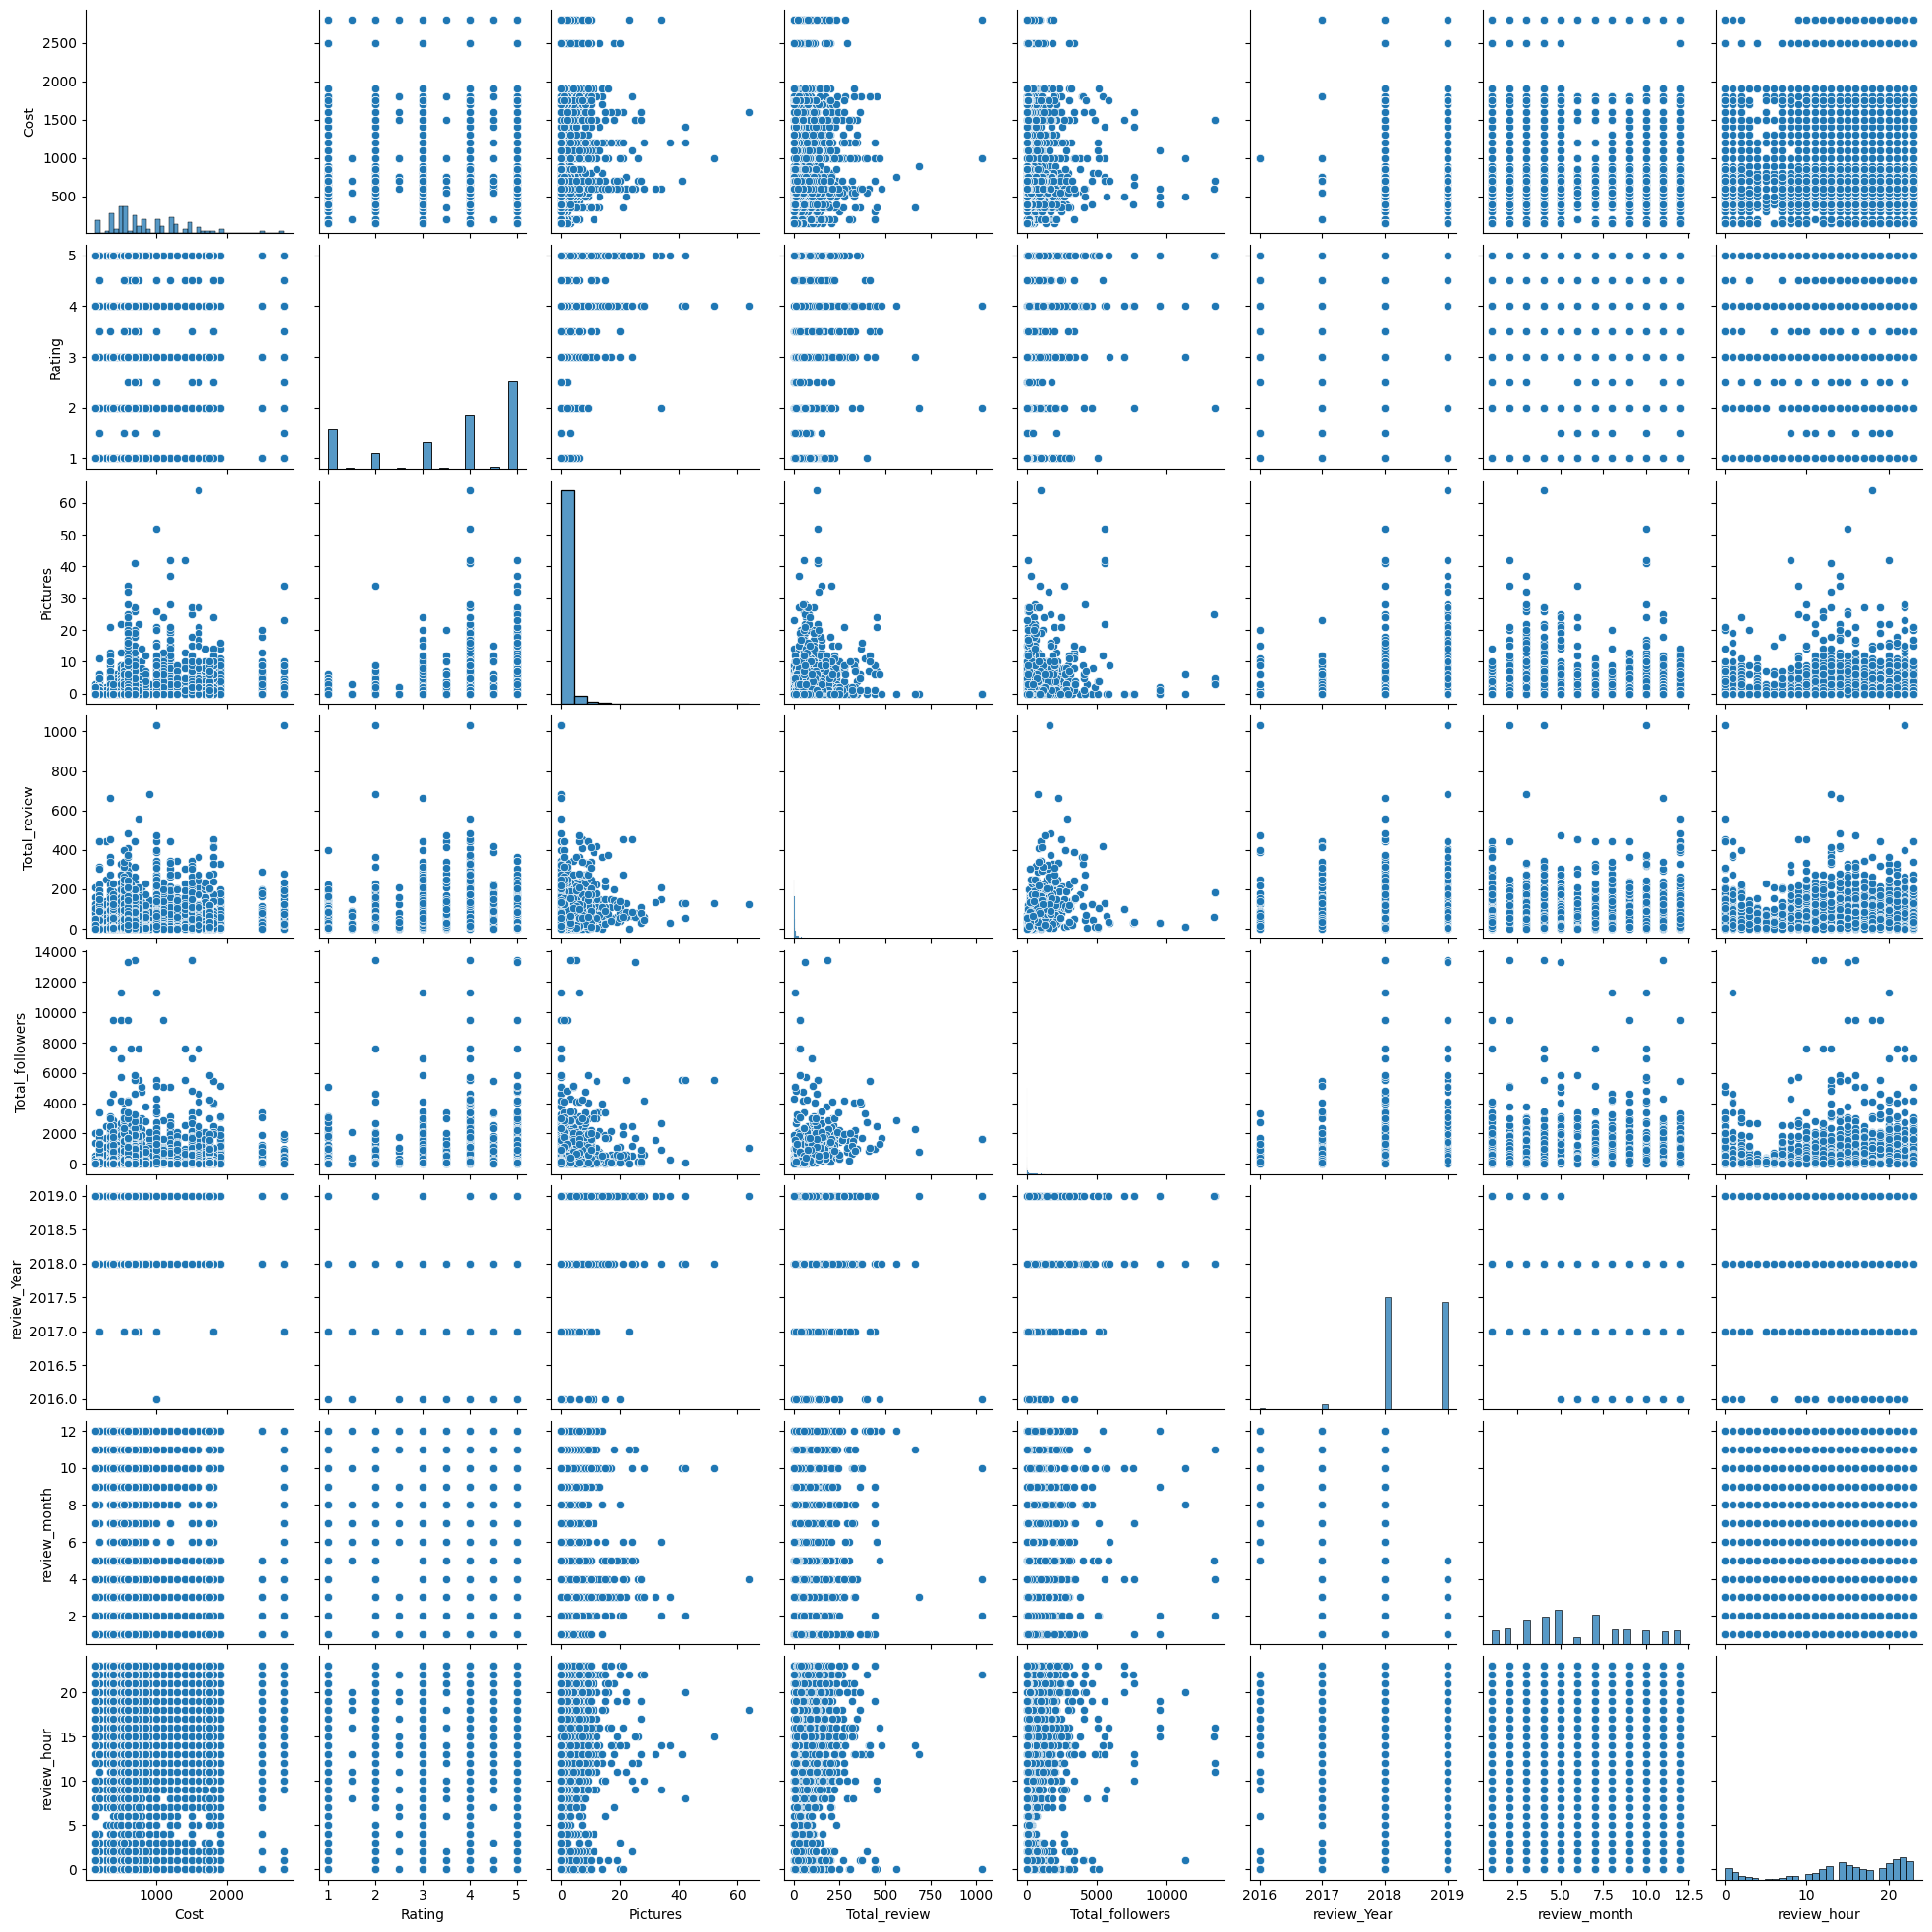

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_merge)

##### 1. Why did you pick the specific chart?

Pairplots offer a quick overview of the relationships between all pairs of variables in a dataset. Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

We can see  Total_review has a positive  relation with Total_followers and pictures.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

1.  The cost of a restaurant has a  positive correlation with the rating
     it receives.

2.   Restaurants that are reviewed by reviewers with more followers will
     have a higher rating.

3.   Restaurants offering a wide variety of cuisines may receive higher
     ratings.

### Hypothetical Statement - 1

The cost of a restaurant has a positive correlation with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null hypothesis: There is no relationship between the cost of
     restaurant and the rating it receives. (H0: 𝛽1 = 0)

*   Alternative hypothesis: There is a positive relationship between the
     cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

*   Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= df_merge).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost  and the rating.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship between the cost and  the rating.")

Reject Null Hypothesis - There is no relationship between the cost  and the rating.


##### Which statistical test have you done to obtain P-Value?

The statistical test used here is simple linear regression.

##### Why did you choose the specific statistical test?

Linear regression was chosen because it is a common and straightforward method for testing the relationship between two continuous variables.It assesses the relationship between 'Rating' and 'Cost,' helping determine if cost significantly impacts ratings.The p-value of the coefficient for the cost variable can be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis : The number of followers and a reviewer has no effect
     on the rating of a restaurant.(H0: 𝛽1 = 0)

*  Alternate Hypothesis : There is a positive relation between the number
   of followers and the rating of a restaurant. (H1: 𝛽1 > 0).

*   Test : Simple Linear Regression test





#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# fit the linear model
model = smf.ols(formula='Rating ~ Total_followers', data= df_merge).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Null Hypothesis is rejected")
else:
    print("Fail to reject Null Hypothesis")

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

 Simple Linear Regression Test is used.

##### Why did you choose the specific statistical test?

Linear regression was chosen because it is a common and straightforward method for testing the relationship between two continuous variables.It assesses the relationship between 'Rating' and 'Total_Followers'.It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.



### Hypothetical Statement - 3

Restaurants offering a wide variety of cuisines may receive higher ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   Null Hypothesis : Restaurants cuisines has no relation with the
     rating.  (H0: 𝛽1 = 0)

*   Alternative hypothesis: The variety of cuisines offered by a
     restaurant has a positive effect on its rating. (H1: 𝛽1 > 0)

*   Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# merging the new hotel data having 'Cuisines' column  with review data
merged=pd.merge(hotel[['Name','Cost','Cuisines']],review,left_on='Name',right_on='Restaurant')

In [ ]:
# creating a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Null Hypothesis is rejected")
else:
    print("Fail to reject Null Hypothesis")

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

Chi-squared test for independence is used to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?


Chi-squared test is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.The test allows for hypothesis testing to determine whether there is a statistically significant association between the variables, making it a suitable choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# no null values are  for hotel data
print(hotel.isnull().sum())

# null values are present in the Total_followers column
print(review.isnull().sum())

Name            0
Links           0
Cost            0
Cuisines        0
Timings         0
cuisine_list    0
dtype: int64
Restaurant            0
Reviewer              0
Review                0
Rating                0
Time                  0
Pictures              0
Total_review          0
Total_followers    1574
review_Year           0
review_month          0
review_hour           0
Review_length         0
dtype: int64


In [ ]:
#checking null in  reviewer
review[review['Reviewer'].isnull()]

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Time, Pictures, Total_review, Total_followers, review_Year, review_month, review_hour, Review_length]
Index: []

In [ ]:
#checking null in Total_review
review[review['Total_review'].isnull()]

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Time, Pictures, Total_review, Total_followers, review_Year, review_month, review_hour, Review_length]
Index: []

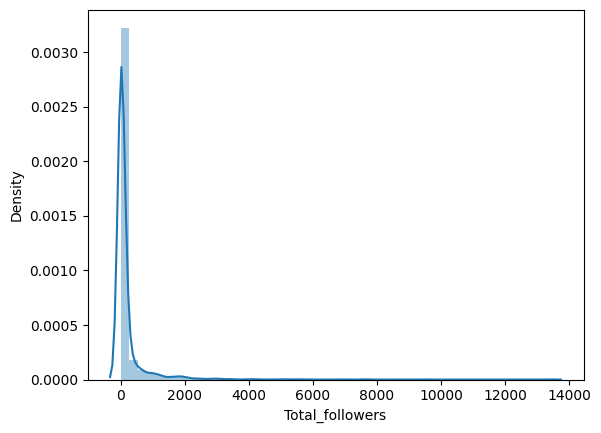

In [ ]:
# checking the distribution
sns.distplot(review['Total_followers'],kde=True)
plt.show()

In [ ]:
# median imputation method
median_total_followers = review['Total_followers'].median()
review['Total_followers'].fillna(median_total_followers, inplace=True)

In [ ]:
# null values are removed
print(review.isnull().sum())

Restaurant         0
Reviewer           0
Review             0
Rating             0
Time               0
Pictures           0
Total_review       0
Total_followers    0
review_Year        0
review_month       0
review_hour        0
Review_length      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

The 'Total_followers' column contains 1574 null values.
As the 'Reviewer' and 'Total_review' coulmn has no null values we cannot drop the null values in the 'Total_followers' column.The distribution of 'Total_followers' is skewed.So we can use the median imputation method.

In [ ]:
# after imputation merged the two datasets
df_mergednew=pd.merge(hotel[['Name','Cost','cuisine_list','Cuisines']],review,left_on='Name',right_on='Restaurant')
df_mergednew.isnull().sum()

Name               0
Cost               0
cuisine_list       0
Cuisines           0
Restaurant         0
Reviewer           0
Review             0
Rating             0
Time               0
Pictures           0
Total_review       0
Total_followers    0
review_Year        0
review_month       0
review_hour        0
Review_length      0
dtype: int64

### 2. Handling Outliers

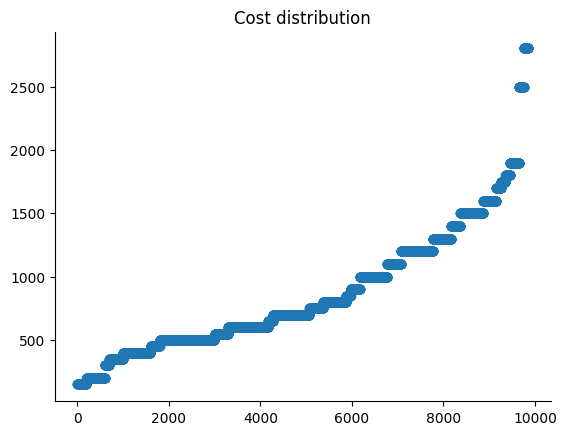

In [ ]:
# Handling Outliers

#plotting graph for cost
plt.scatter(range(df_mergednew.shape[0]), np.sort(df_mergednew['Cost'].values))
plt.title("Cost distribution")
sns.despine()

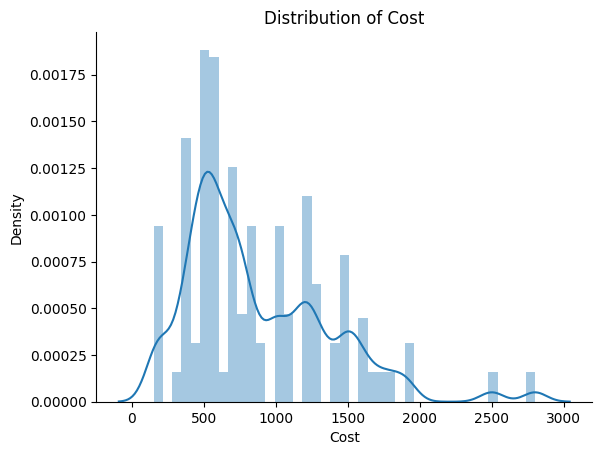

In [ ]:
#distribution of cost
sns.distplot(df_mergednew['Cost'])
plt.title("Distribution of Cost")
sns.despine()

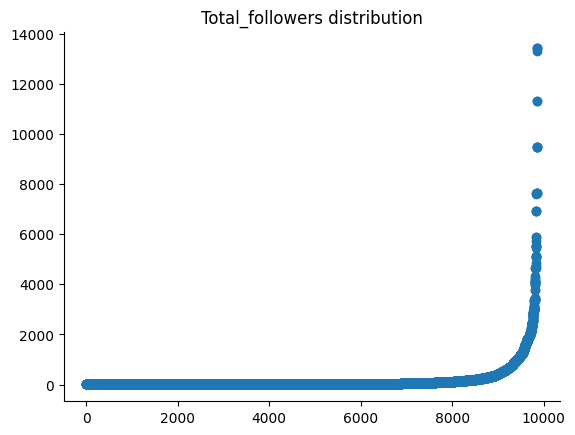

In [ ]:
#plot for total_followers
plt.scatter(range(df_mergednew.shape[0]), np.sort(df_mergednew['Total_followers'].values))
# plt.xlabel('index')
# plt.ylabel('Reviewer_Followers')
plt.title("Total_followers distribution")
sns.despine()

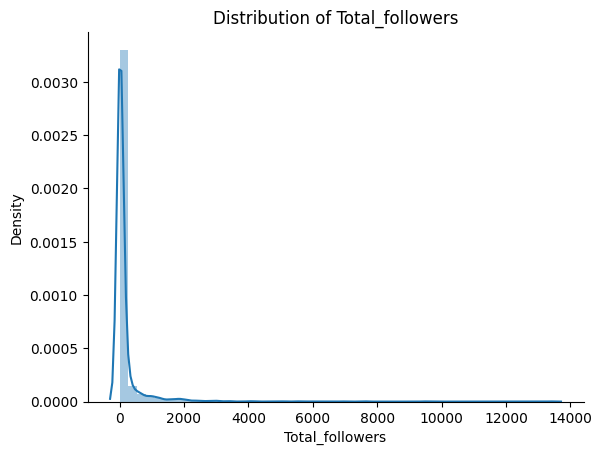

In [ ]:
#distribution of Total_followers
sns.distplot(df_mergednew['Total_followers'])
plt.title("Distribution of Total_followers")
sns.despine()

In [ ]:
# Outlier treatments
# defining a function for outlier treatment using IQR method
def outlier_treatment_skew(df,feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR= Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return lower_bound,upper_bound

In [ ]:
# Lower Limit Capping for 'Cost' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Cost')
df_mergednew.loc[df_mergednew['Cost'] <= lower_bound, 'Cost'] = lower_bound

# Upper Limit Capping for 'Cost' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Cost')
df_mergednew.loc[df_mergednew['Cost'] >= upper_bound, 'Cost'] = upper_bound

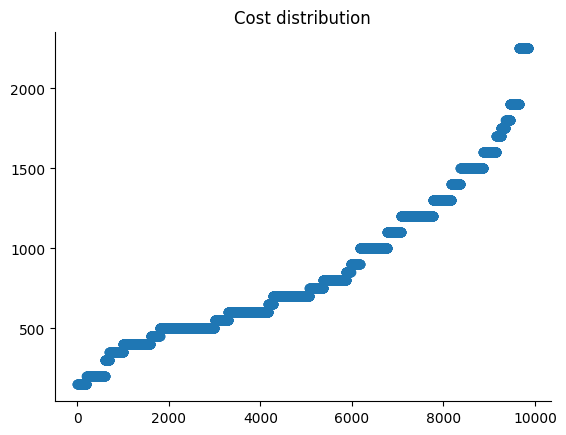

In [ ]:
#checking for outlier removal for 'Cost' column
plt.scatter(range(df_mergednew.shape[0]), np.sort(df_mergednew['Cost'].values))
plt.title("Cost distribution")
sns.despine()

In [ ]:
# Lower Limit Capping for 'Total_followers' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Total_followers')
df_mergednew.loc[df_mergednew['Cost'] <= lower_bound, 'Total_followers'] = lower_bound

# Upper Limit Capping for 'Total_followers' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Total_followers')
df_mergednew.loc[df_mergednew['Total_followers'] >= upper_bound, 'Total_followers'] = upper_bound

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since Cost and Total_follower column show skewed distribution and using scatter plot  found they have outliers, hence using the capping technique. Instead of removing the outliers, capped outliers with the upper bound and lower bound using IQR method.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# creating dummy df with columns 'Restaurant'and 'Cuisines'
dummy = df_mergednew[['Restaurant','Cuisines']]
# splitting with ','
dummy['Cuisines'] = dummy['Cuisines'].str.split(',')
# converting into unique individual items
dummy = dummy.explode('Cuisines')
# removing extra trailing space
dummy['Cuisines'] = dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies
dummy = pd.get_dummies(dummy, columns=["Cuisines"], prefix=["Cuisines"])


In [ ]:
# grouping by restaurant
dummy = dummy.groupby("Restaurant").sum().reset_index()
dummy.shape

(99, 43)

In [ ]:
#creating a column count of total cuisines
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
#adding a column  average rating
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean'}).reset_index().rename(columns = {'Rating': 'Average_Rating'})

#  merging to hotel data
hotel = pd.merge(hotel,avg_hotel_rating[['Restaurant','Average_Rating']], left_on = 'Name',right_on='Restaurant')


In [ ]:
# merging the dummy with hotel
dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(dummy, on = 'Restaurant')

In [ ]:
dummy.shape

(99, 46)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used one hot encoding on the cuisine category and based on the cuisine if present  gave value as 1 and if absent gave value as 0.One-hot encoding preserves the information present in categorical variables without assuming any ordinal relationship between categories.One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

Created Total_Cuisine_Count and Average_Rating and merged with dummy.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#creating seniment_df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
# resetting the index
sentiment_df = sentiment_df.reset_index()
# setting index
sentiment_df['index'] = sentiment_df.index

sentiment_df[10:17]

index           Reviewer       Restaurant  Rating  \
10     10   Saubhagya Bhuyan  Beyond Flavours     5.0   
11     11         Srivaths07  Beyond Flavours     5.0   
12     12        Kunj Mishra  Beyond Flavours     5.0   
13     13  Pradeep Vetapalem  Beyond Flavours     5.0   
14     14      Kankaria.ritu  Beyond Flavours     1.0   
15     15       Abhay Sharma  Beyond Flavours     5.0   
16     16    Shubham Jaiswal  Beyond Flavours     4.0   

                                               Review  
10  The service was great and the food was awesome...  
11  Very good ambience, amazing food ,good service...  
12  Food was very good. Soup was as expected. In s...  
13  Food is too good. Telangana kodiak fry is must...  
14  We ordered corn cheese balls, manchow soup and...  
15  Food and ambience is fantastic.. Waiter Manav ...  
16  Came here for lunch and the food was good and ...

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [ ]:
sentiment_df['Review'][:5]

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: Review, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review']=sentiment_df['Review'].str.lower()

In [ ]:
sentiment_df['Review'][:5]

0    the ambience was good, food was quite good . h...
1    ambience is too good for a pleasant evening. s...
2    a must try.. great food great ambience. thnx f...
3    soumen das and arun was a great guy. only beca...
4    food is good.we ordered kodi drumsticks and ba...
Name: Review, dtype: object

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

# function for removing punctuations
def remove_punctuation(text):

    # Create a translation table mapping punctuation characters to None
    translator = str.maketrans('', '', string.punctuation)

    # Use translate method to remove punctuation
    text_without_punct = text.translate(translator)

    return text_without_punct

In [ ]:
# applying the function in Review column
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [ ]:
sentiment_df['Review'][:5]

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Review, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

# Remove URLs
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
sentiment_df['Review'][:5]

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Review, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove Stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):

    # Remove stopwords and join the words back into a string
    text = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(text)

In [ ]:
# Apply remove_stopwords function to 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)


In [ ]:
sentiment_df['Review'][:5]

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object

In [ ]:
# Remove White spaces
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:''.join(x.split()))

In [ ]:
sentiment_df['Review'][:5]

0    ambiencegoodfoodquitegoodsaturdaylunchcosteffe...
1    ambiencegoodpleasanteveningservicepromptfoodgo...
2    musttrygreatfoodgreatambiencethnxservicepradee...
3    soumendasarungreatguybehaviorsinceretygoodfood...
4    foodgoodweorderedkodidrumsticksbasketmuttonbir...
Name: Review, dtype: object

#### 6. Rephrase Text

In [ ]:
# Download WordNet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Rephrase Text

# Function to rephrase text by replacing words with synonyms
def rephrase_text(text):

    # Initialize an empty list to store rephrased words
    rephrased_words = []

    # Iterate through each word
    for word in text.split():
        # Get synonyms for the word from WordNet
        synonyms = []
        for syn in wordnet.synsets(word):    #iterate over each set of synonyms for the given word
            for lemma in syn.lemmas():    #iterate over each lemma (synonym)
                synonyms.append(lemma.name())    ##append to the synonyms list

        # If synonyms are found, replace the word with a random synonym
        if synonyms:
            new_word = synonyms[0]  # Choose the first synonym
            rephrased_words.append(new_word)  #append to the list
        else:
            rephrased_words.append(word)  # If no synonyms found, keep the original word

    # Join the rephrased words back into a string
    rephrased_text = ' '.join(rephrased_words)

    return rephrased_text

In [ ]:
# Apply rephrase_text function to 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_text)

In [ ]:
sentiment_df['Review'][:5]

0    ambiencegoodfoodquitegoodsaturdaylunchcosteffe...
1    ambiencegoodpleasanteveningservicepromptfoodgo...
2    musttrygreatfoodgreatambiencethnxservicepradee...
3    soumendasarungreatguybehaviorsinceretygoodfood...
4    foodgoodweorderedkodidrumsticksbasketmuttonbir...
Name: Review, dtype: object

#### 7. Tokenization

In [ ]:
# download punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenization( splitting text into individual words or tokens)
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df['Review'][:5]

0    [ambiencegoodfoodquitegoodsaturdaylunchcosteff...
1    [ambiencegoodpleasanteveningservicepromptfoodg...
2    [musttrygreatfoodgreatambiencethnxserviceprade...
3    [soumendasarungreatguybehaviorsinceretygoodfoo...
4    [foodgoodweorderedkodidrumsticksbasketmuttonbi...
Name: Review, dtype: object

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

In [ ]:
sentiment_df['Review'][:5]

0    [ambiencegoodfoodquitegoodsaturdaylunchcosteff...
1    [ambiencegoodpleasanteveningservicepromptfoodg...
2    [musttrygreatfoodgreatambiencethnxserviceprade...
3    [soumendasarungreatguybehaviorsinceretygoodfoo...
4    [foodgoodweorderedkodidrumsticksbasketmuttonbi...
Name: Review, dtype: object

##### Which text normalization technique have you used and why?

Lemmatization is used as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. Lemmatization reduces words to their base form (lemma) based on the word's meaning in context. It uses vocabulary analysis to accurately determine the lemma of a word.Lemmatization generally produces more accurate results compared to stemming because it considers the context and part-of-speech of the word.

#### 9. Part of speech tagging

In [ ]:
# Download the averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# POS Taging
# performs POS tagging on each review, resulting in a list of tuples
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.pos_tag)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

# Initialize TfidfVectorizer with custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)

# Transform the 'Review' column into TF-IDF features

X_tfidf = vectorizer.fit_transform(sentiment_df['Review'])


##### Which text vectorization technique have you used and why?

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.
Tf-idf Vectorization technique was used here.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
hotel.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'cuisine_list',
       'Total_Cuisine_Count', 'Restaurant', 'Average_Rating'],
      dtype='object')

In [ ]:
hotel.shape

(99, 9)

In [ ]:
# dropping the 'Name','Links' and 'cuisine_list' columns
hotel=hotel.drop(columns=['Name','Links','cuisine_list'],axis=1)

In [ ]:
# dropped the columns
hotel.columns

Index(['Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count', 'Restaurant',
       'Average_Rating'],
      dtype='object')

In [ ]:
dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian',
       'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery',
       'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger',
       'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental',
       'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food',
       'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food',
       'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian',
       'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices',
       'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean',
       'Cuisines_Mexican', 'Cuisines_Modern Indian', 'Cuisines_Momos',
       'Cuisines_Mughlai', 'Cuisines_North Eastern', 'Cuisines_North Indian',
       'Cuisines_Pizza', 'Cuisines_Salad', 'Cuisines_Seafood',
       'Cuisines_South Indian', 'Cuisines_Spanish', 'Cuisines_Street Food',
       'Cuisines_Sush

In [ ]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Total_review', 'Total_followers', 'review_Year', 'review_month',
       'review_hour', 'Review_length'],
      dtype='object')

In [ ]:
# dataframe for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review'], dtype='object')

In [ ]:
 # For ratings above average we set the value of Sentiment as 1 and below average 0.
sentiment_df['Sentiment']=sentiment_df['Rating'].apply(lambda x:1 if x>=sentiment_df['Rating'].mean() else 0)

In [ ]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9950   9950      Abhishek Mahajan  Chinese Pavilion     3.0   
9951   9951        Sharad Agrawal  Chinese Pavilion     4.5   
9952   9952             Ramandeep  Chinese Pavilion     1.5   
9953   9953       Nayana Shanbhag  Chinese Pavilion     4.0   
9954   9954      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  Sentiment  
0     [(ambiencegoodfoodquitegoodsaturdaylunchcostef...          1  
1     [(ambiencegoodpleasanteveningservicepromptfood...          1  
2     [(musttrygreatfoodgreatambiencethnxserviceprad...          1  
3     [(soumendasarungreatguybehaviorsinceretygoodfo...          1  
4     [(foodgoodweorderedkodidrumsticksbasketmuttonb...          1  
...                                                 ...        ...  
9950  [(madhumathimahajanwellstartnicecourteousserve...          0  
9951  [(placeneverdisappointedusfoodcourteousstaffse...          1  
9952  [(badratingmainlychickenbonefoundvegfoodaccept...          0  
9953  [(personallylovepreferchinesefoodcoupletimeshu...          1  
9954  [(checkedtrydeliciouschinesefoodseennonveglunc...          0  

[9955 rows x 6 columns]

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
hotel.columns

Index(['Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count', 'Restaurant',
       'Average_Rating'],
      dtype='object')

In [ ]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Total_review', 'Total_followers', 'review_Year', 'review_month',
       'review_hour', 'Review_length'],
      dtype='object')

In [ ]:
dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian',
       'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery',
       'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger',
       'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental',
       'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food',
       'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food',
       'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian',
       'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices',
       'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean',
       'Cuisines_Mexican', 'Cuisines_Modern Indian', 'Cuisines_Momos',
       'Cuisines_Mughlai', 'Cuisines_North Eastern', 'Cuisines_North Indian',
       'Cuisines_Pizza', 'Cuisines_Salad', 'Cuisines_Seafood',
       'Cuisines_South Indian', 'Cuisines_Spanish', 'Cuisines_Street Food',
       'Cuisines_Sush

In [ ]:
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

 PCA method will be used for feature selection and will do in the later step.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needs to be transformed as the cost feature is skewed.

In [ ]:
# finding the symmetric and non-symmetric features

# initializing the empty sets
symmetric_feature=[]
non_symmetric_feature=[]
# iterating through the columns of describe function
for i in dummy.describe().columns:
  if abs(dummy[i].mean()-dummy[i].median())<0.1:     #compares the absolute difference between the mean and median to a threshold value of 0.1
    symmetric_feature.append(i)                      #appending to symmetric features list
  else:
    non_symmetric_feature.append(i)                 #appending to non-symmetric features list

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost', 'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian', 'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery', 'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger', 'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental', 'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food', 'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food', 'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian', 'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices', 'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean', 'Cuisines_Mexican', 'Cuisines_Modern Indian', 'Cuisines_Momos', 'Cuisines_Mughlai', 'Cuisines_North Eastern', 'Cuisines_North Indian', 'Cuisines_Pizza', 'Cuisines_Salad', 'Cuisines_Seafood', 'Cuisines_South Indian', 'Cuisines_Spanish', 'Cuisines_Street Food', 'Cuisines_Sushi', 'Cuisines_Thai', 'Cuisines_Wraps']


In [ ]:
# Transform the data using log transformation
dummy['Cost'] = np.log1p(dummy['Cost'])

Log transformation is used here to transform the 'Cost' column as it is skewed.Log transformation can help normalize the distribution of skewed data, making it more symmetric. This is particularly useful when dealing with data that has a long tail or is heavily right-skewed.

### 6. Data Scaling

In [ ]:
dummy.head()

Restaurant      Cost  Average_Rating  \
0                 Beyond Flavours  6.685861            4.28   
1                        Paradise  6.685861            4.70   
2                        Flechazo  7.170888            4.66   
3  Shah Ghouse Hotel & Restaurant  6.685861            3.21   
4      Over The Moon Brew Company  7.090910            4.34   

   Total_Cuisine_Count  Cuisines_American  Cuisines_Andhra  Cuisines_Arabian  \
0                    6                  0                0                 0   
1                    3                  0                0                 0   
2                    4                  0                0                 0   
3                    5                  0                0                 0   
4                    5                  0                0                 0   

   Cuisines_Asian  Cuisines_BBQ  Cuisines_Bakery  ...  Cuisines_North Indian  \
0               0             0                0  ...                    100   
1               0             0                0  ...                    100   
2             100             0                0  ...                    100   
3               0             0                0  ...                    100   
4             100             0                0  ...                    100   

   Cuisines_Pizza  Cuisines_Salad  Cuisines_Seafood  Cuisines_South Indian  \
0               0               0                 0                    100   
1               0               0                 0                      0   
2               0               0                 0                      0   
3               0               0               100                      0   
4               0               0                 0                      0   

   Cuisines_Spanish  Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  \
0                 0                     0               0              0   
1                 0                     0               0              0   
2                 0                     0               0              0   
3                 0                     0               0              0   
4                 0                     0               0              0   

   Cuisines_Wraps  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 46 columns]

In [ ]:
# Scaling the numeric columns using StandardScaler
numeric_columns=['Cost',	'Average_Rating',	'Total_Cuisine_Count']
# initializing the StandardScaler
sc=StandardScaler()
#  Fit and transform the numeric columns of the DataFrame 'dummy'
sc.fit(dummy[numeric_columns])
dummy_scaled=dummy.copy()
dummy_scaled[numeric_columns]=sc.transform(dummy[numeric_columns])

##### Which method have you used to scale you data and why?

Here StandardScaler is used for data scaling as the numeric columns were normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

With a higher number of features, there's a risk of overfitting the model.  As the number of features increases, the computational cost of clustering algorithm also increases. In addition,due to the  high dimensionality  the clusters become harder to identify.  Therefore, feature reduction becomes crucial to improve model performance.

In [ ]:
dummy_scaled.head()

Restaurant      Cost  Average_Rating  \
0                 Beyond Flavours  0.138417        1.331006   
1                        Paradise  0.138417        2.158913   
2                        Flechazo  0.942626        2.080065   
3  Shah Ghouse Hotel & Restaurant  0.138417       -0.778187   
4      Over The Moon Brew Company  0.810016        1.449278   

   Total_Cuisine_Count  Cuisines_American  Cuisines_Andhra  Cuisines_Arabian  \
0             2.470616                  0                0                 0   
1            -0.008347                  0                0                 0   
2             0.817974                  0                0                 0   
3             1.644295                  0                0                 0   
4             1.644295                  0                0                 0   

   Cuisines_Asian  Cuisines_BBQ  Cuisines_Bakery  ...  Cuisines_North Indian  \
0               0             0                0  ...                    100   
1               0             0                0  ...                    100   
2             100             0                0  ...                    100   
3               0             0                0  ...                    100   
4             100             0                0  ...                    100   

   Cuisines_Pizza  Cuisines_Salad  Cuisines_Seafood  Cuisines_South Indian  \
0               0               0                 0                    100   
1               0               0                 0                      0   
2               0               0                 0                      0   
3               0               0               100                      0   
4               0               0                 0                      0   

   Cuisines_Spanish  Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  \
0                 0                     0               0              0   
1                 0                     0               0              0   
2                 0                     0               0              0   
3                 0                     0               0              0   
4                 0                     0               0              0   

   Cuisines_Wraps  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 46 columns]

In [ ]:
# DImensionality Reduction (If needed)
# applying PCA

#setting restaurant feature as index as it still had categorial value
dummy_scaled.set_index(['Restaurant'],inplace=True)

# returns an Index object containing the column labels of the DataFrame dummy_scaled.
features=dummy_scaled.columns
#Initialize PCA
pca=PCA()

# Fit PCA to the scaled features
pca.fit(dummy_scaled[features])

PCA()

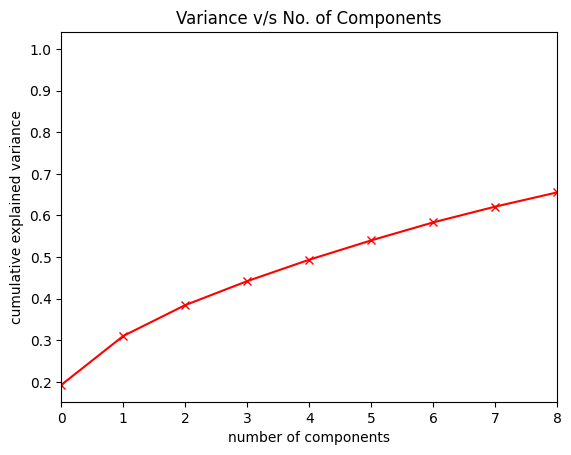

In [ ]:
#explained variance v/s no. of components

# returns an array containing the ratio of variance explained by each of the principal components.
var_ratio=pca.explained_variance_ratio_

# plotting the variance ratio v/s no. of components
plt.plot(np.cumsum(var_ratio), marker ='x', color = 'red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance',)
plt.title('Variance v/s No. of Components')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(dummy_scaled[features])

# explained variance ratio of each principal component
print('Explained variance: {}'.format(var_ratio))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.1%}'.format(
                                        np.sum(var_ratio)))

# transform data to principal component space
dummy_pca = pca.transform(dummy_scaled[features])

Explained variance: [1.92864550e-01 1.17646886e-01 7.41552344e-02 5.75830330e-02
 5.14099732e-02 4.64398994e-02 4.32577761e-02 3.78371611e-02
 3.42294624e-02 2.93087861e-02 2.75082337e-02 2.50328660e-02
 2.37247246e-02 2.05635015e-02 2.00087278e-02 1.90743283e-02
 1.83338604e-02 1.64963079e-02 1.51912521e-02 1.33445408e-02
 1.25241557e-02 1.22977855e-02 1.09393156e-02 9.74714376e-03
 8.99918302e-03 7.70595463e-03 6.38773398e-03 6.28667655e-03
 5.65802131e-03 4.36014957e-03 3.88214336e-03 3.71980739e-03
 3.55646379e-03 3.22842165e-03 2.97547828e-03 2.68258617e-03
 2.58831010e-03 2.40268040e-03 2.09665569e-03 1.76254825e-03
 1.64940466e-03 5.05976101e-04 2.10631044e-05 1.10981338e-05
 1.38703727e-07]
Cumulative variance explained by 3 principal components: 100.0%


In [ ]:
# reduced the features from 45 to 3
print(dummy_scaled.shape)
print(dummy_pca.shape)

(99, 45)
(99, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible.PCA (Principal Component Analysis) is a widely used dimensionality reduction method, which is used here,  because it is able to identify patterns in the data that are responsible for the most variation. In this particular case, PCA was employed to reduce the dimensionality to 3 based on the characteristics of the elbow curve.

The cumulative variance by 3 components is 100%.This means that all the variance in the dataset is captured by the three principal components, implying no loss of information.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# for sentiment analysis using sentiment_df dataframe

X = X_tfidf      # independent variable for sentiment analysis
# storing the target variable
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9955, 6)

In [ ]:
#splitting test train in the raio 80:20

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

##### What data splitting ratio have you used and why?

The dataset's size is 9955 records, so  splitting  the data into 80:20 ratio for training and testing, respectively.

### 9. Handling Imbalanced Dataset

In [ ]:
# percentage of sentiment counts
sentiment_df['Sentiment'].value_counts(normalize=True)*100

1    62.97338
0    37.02662
Name: Sentiment, dtype: float64

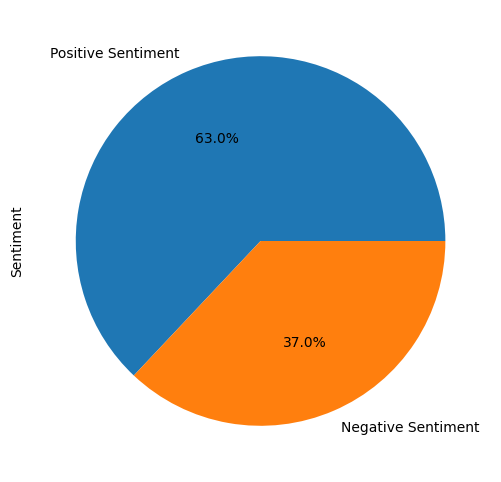

In [ ]:
# Setiment Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               labels=['Positive Sentiment','Negative Sentiment'])

plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

The class imbalance ratio is 63: 37, where 63 is the majaority class and 37 is the minority class.It appears that the dataset is well-suited for analysis since there is only a minor class imbalance.So no need to use the class imbalance techniques.

## ***7. ML Model Implementation***

### ML Model - 1

###K-Means Clustering
###Elbow method

In [ ]:
# ML Model - 1 Implementation
# determine the appropriate number of clusters for KMeans clustering by computing the inertia

# define an empty list cluster_errors to store the inertia for each number of clusters
cluster_errors = []
cluster_range = range( 1, 11)  #define a range of cluster numbers from 1 to 10
for num_clusters in cluster_range:
    km=KMeans(num_clusters,random_state = 20,n_init = 5)   # initialize a KMeans object 'km'
    km.fit(dummy_pca)  # fit the KMeans model
    cluster_errors.append(km.inertia_)     # capture the intertia

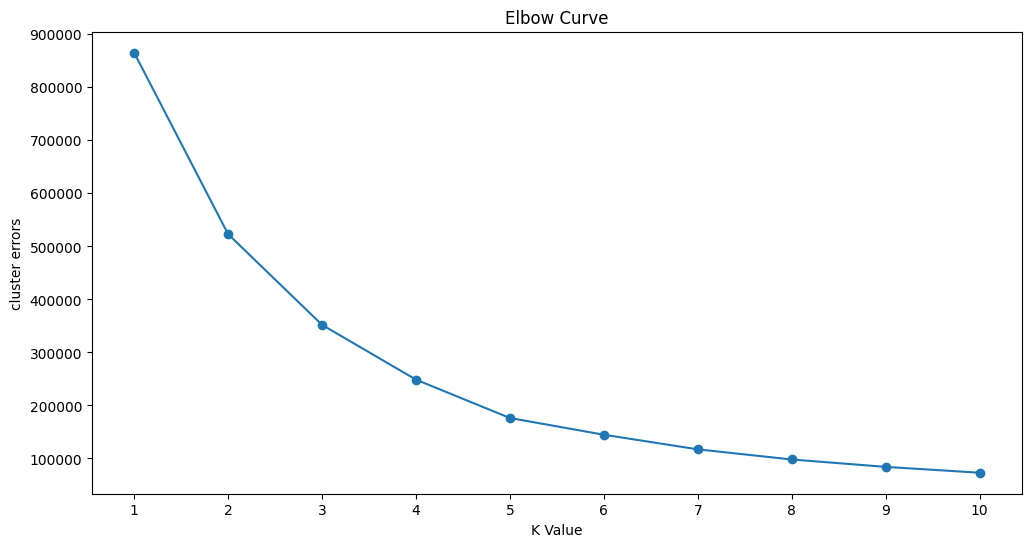

In [ ]:
# plotting the elbow curve
plt.figure(figsize=(12,6))
plt.plot( cluster_range, cluster_errors, marker = "o" )
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("cluster errors")
plt.title('Elbow Curve')
plt.show()

###Silhouette method

For n_clusters = 2 The average silhouette_score is : 0.40169416838462557


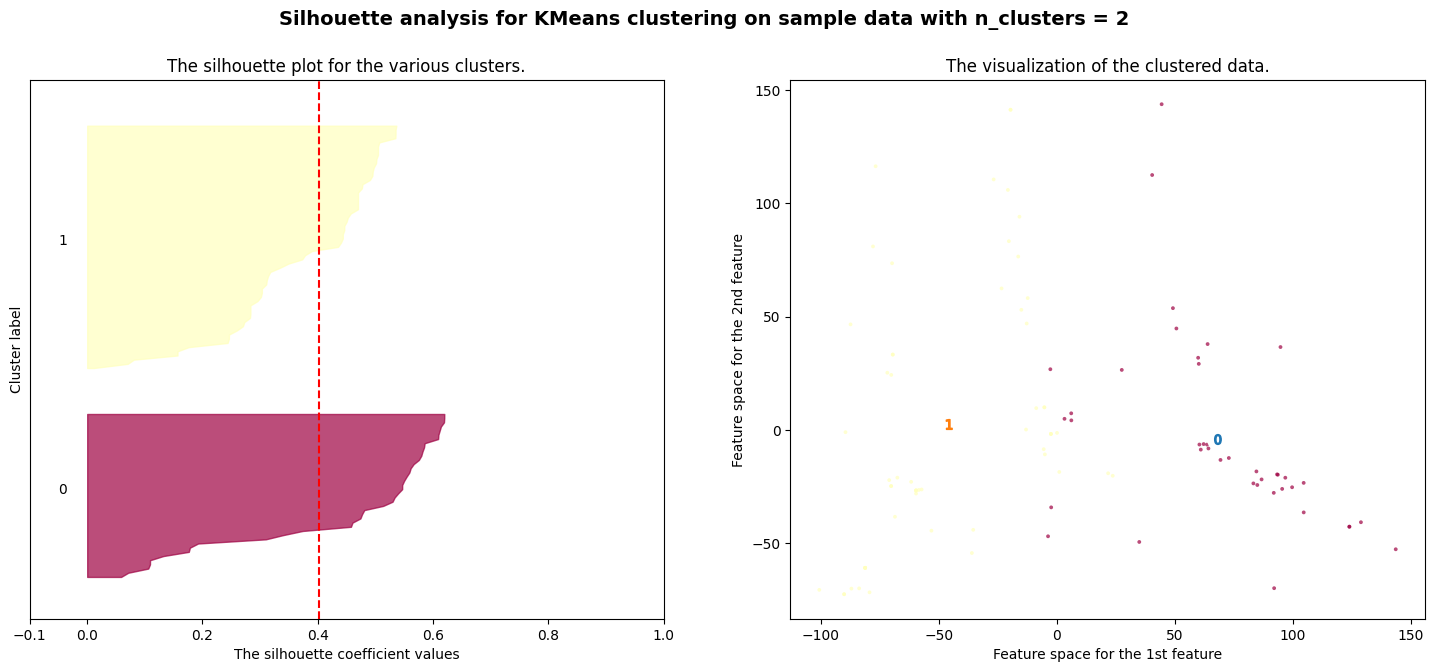

For n_clusters = 3 The average silhouette_score is : 0.445039961539252


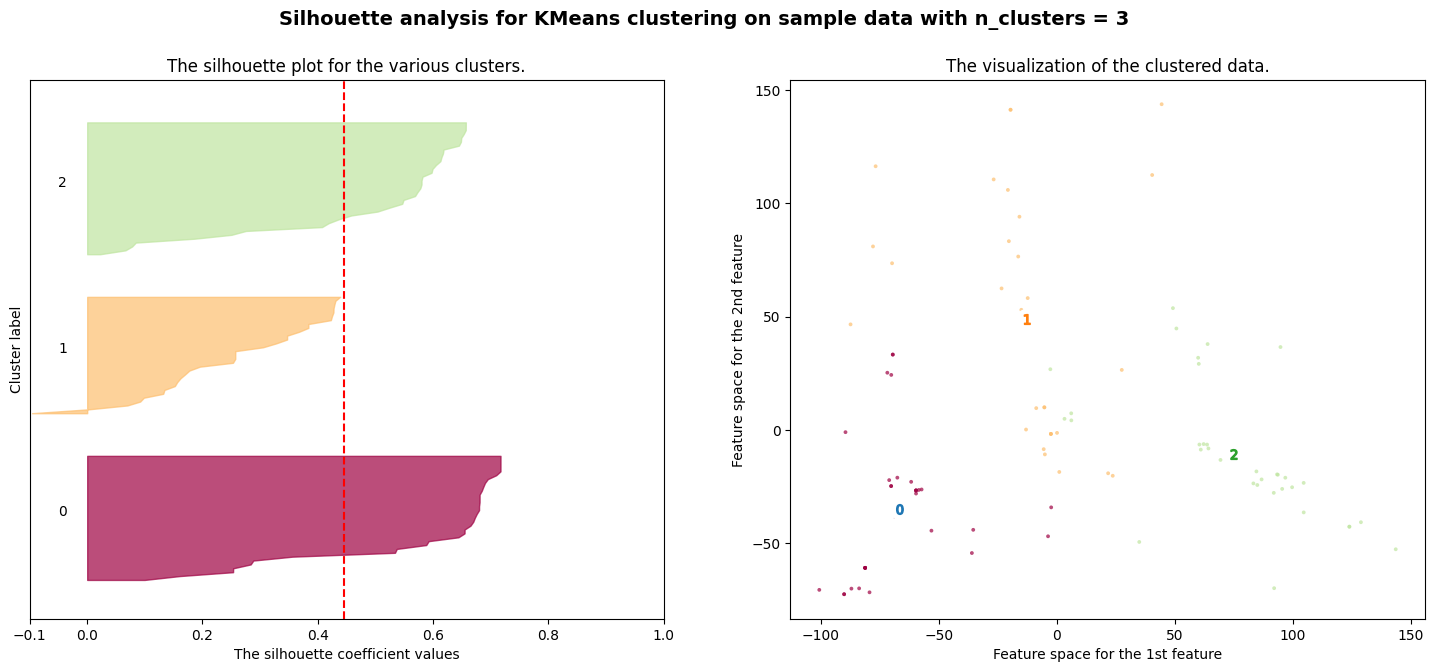

For n_clusters = 4 The average silhouette_score is : 0.46711490433714725


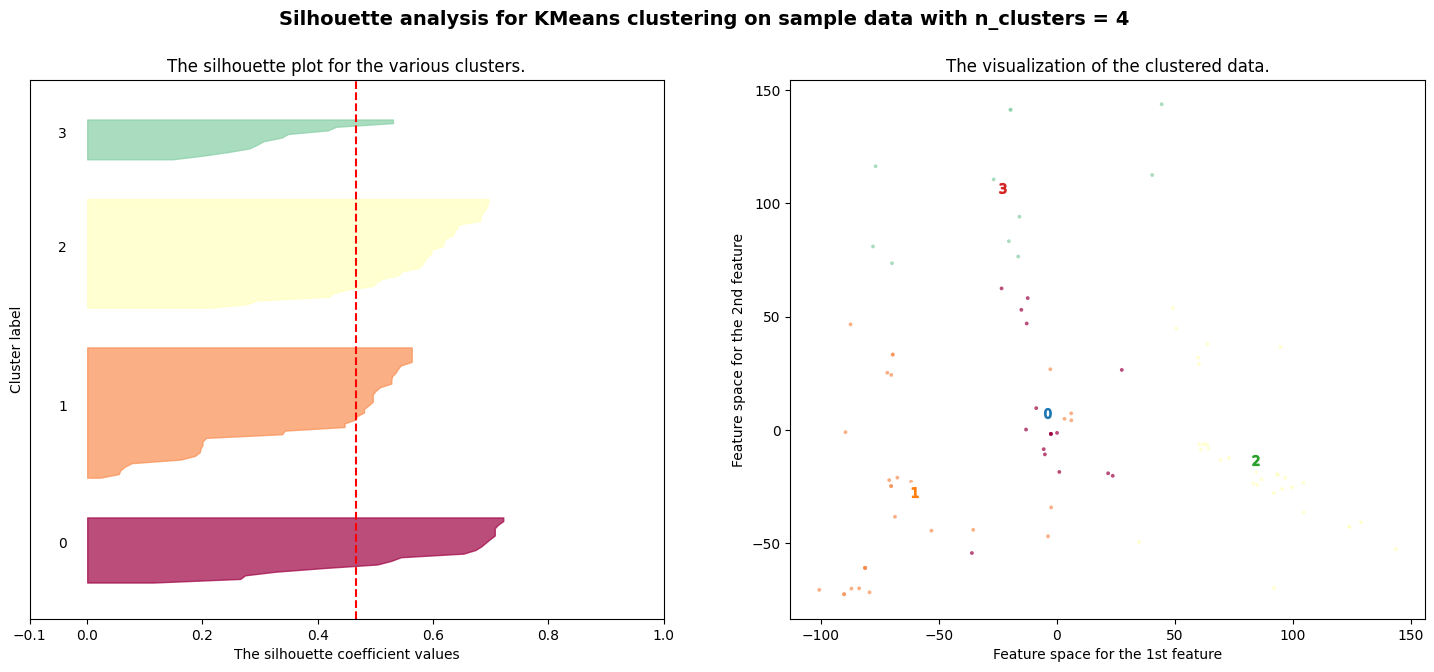

For n_clusters = 5 The average silhouette_score is : 0.5087817036600293


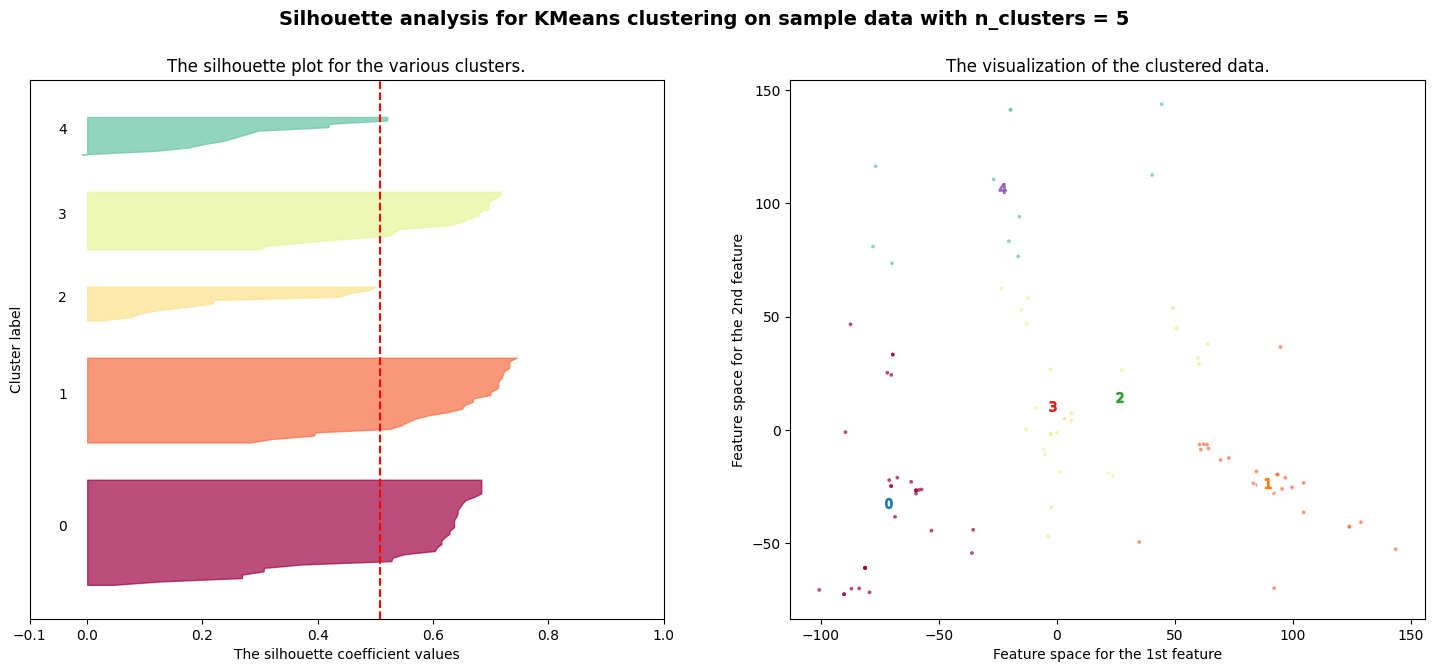

For n_clusters = 6 The average silhouette_score is : 0.5197216334720992


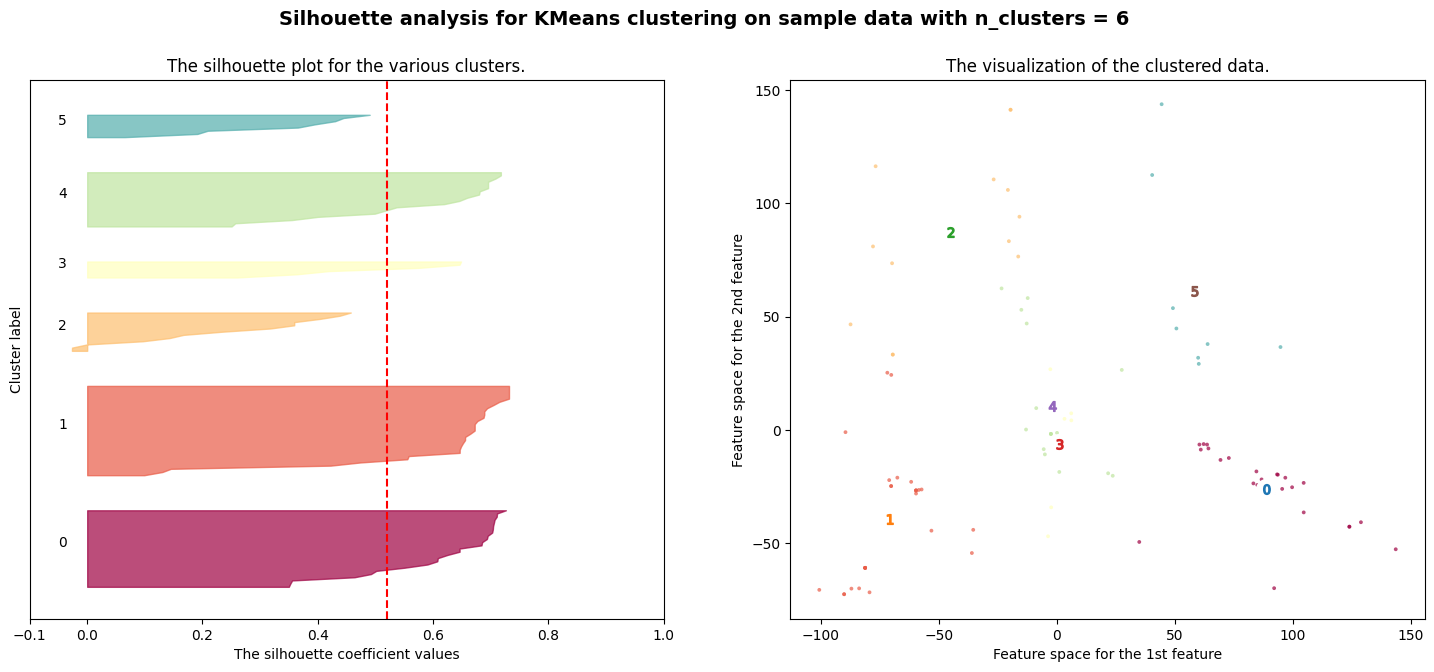

For n_clusters = 7 The average silhouette_score is : 0.45839089186377546


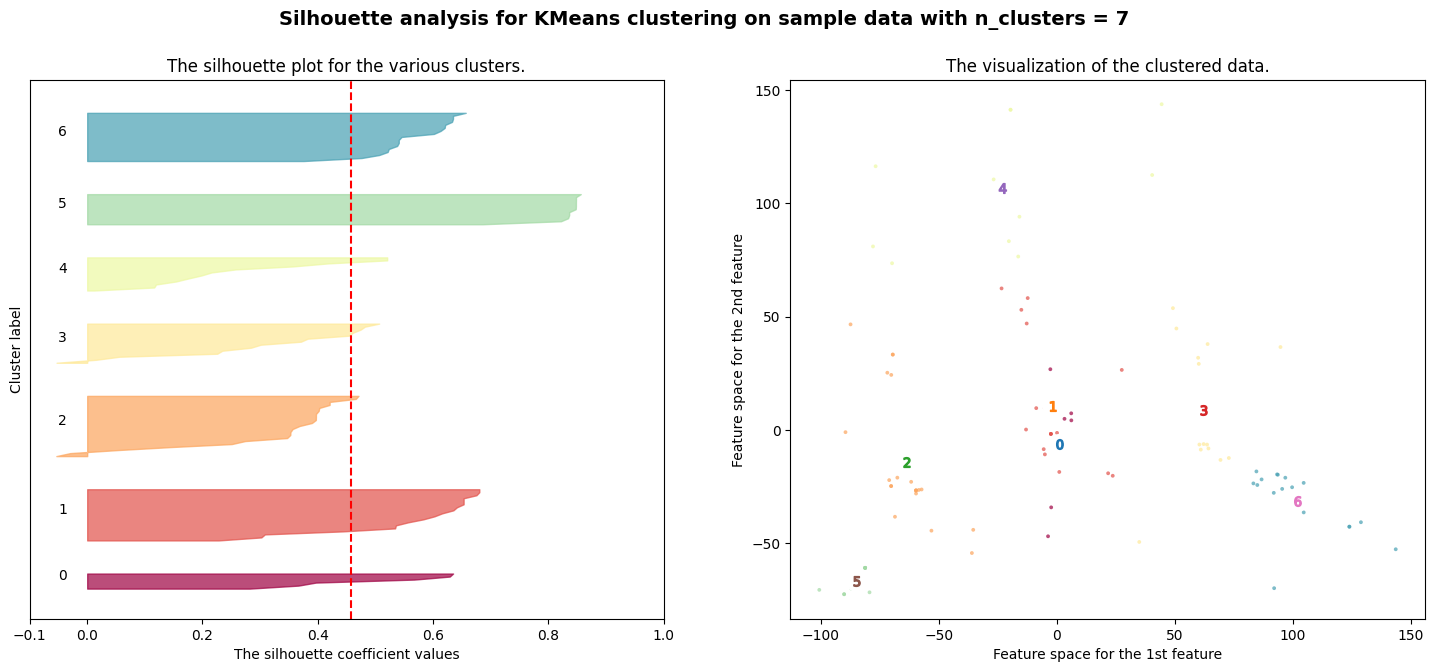

For n_clusters = 8 The average silhouette_score is : 0.47994971588919794


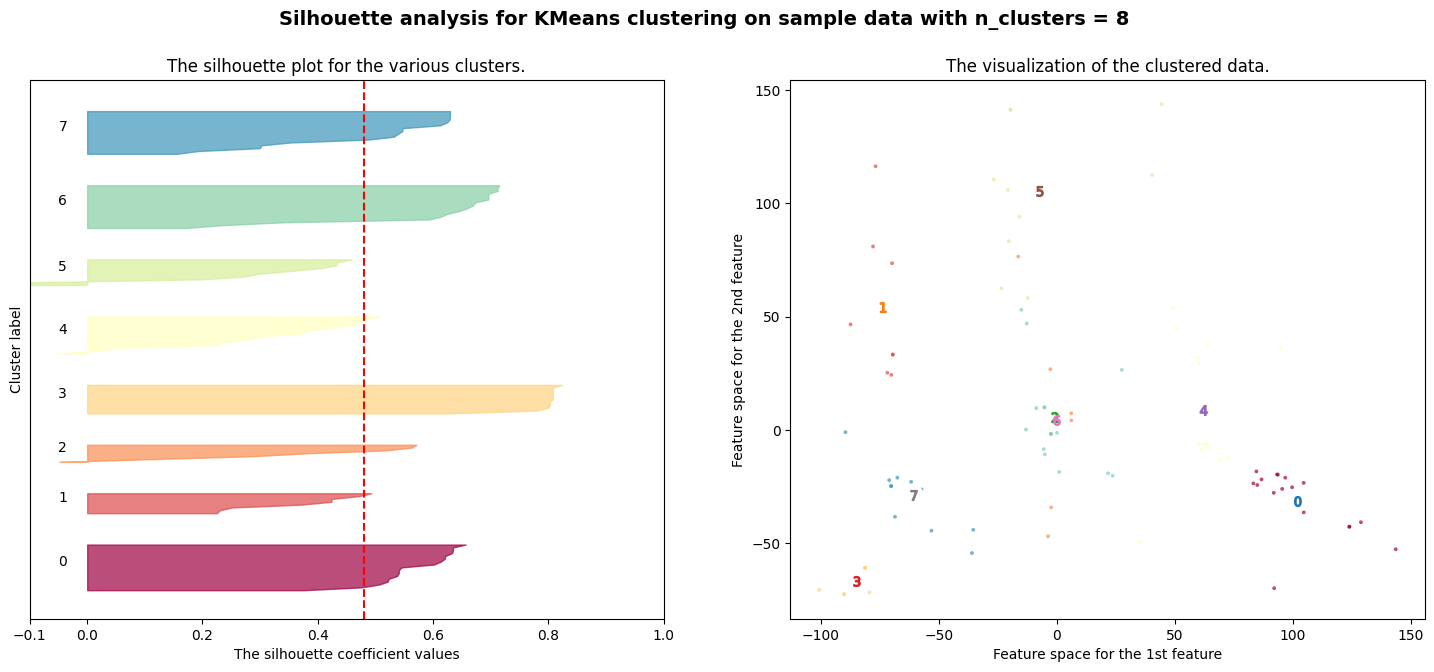

For n_clusters = 9 The average silhouette_score is : 0.5046139855692046


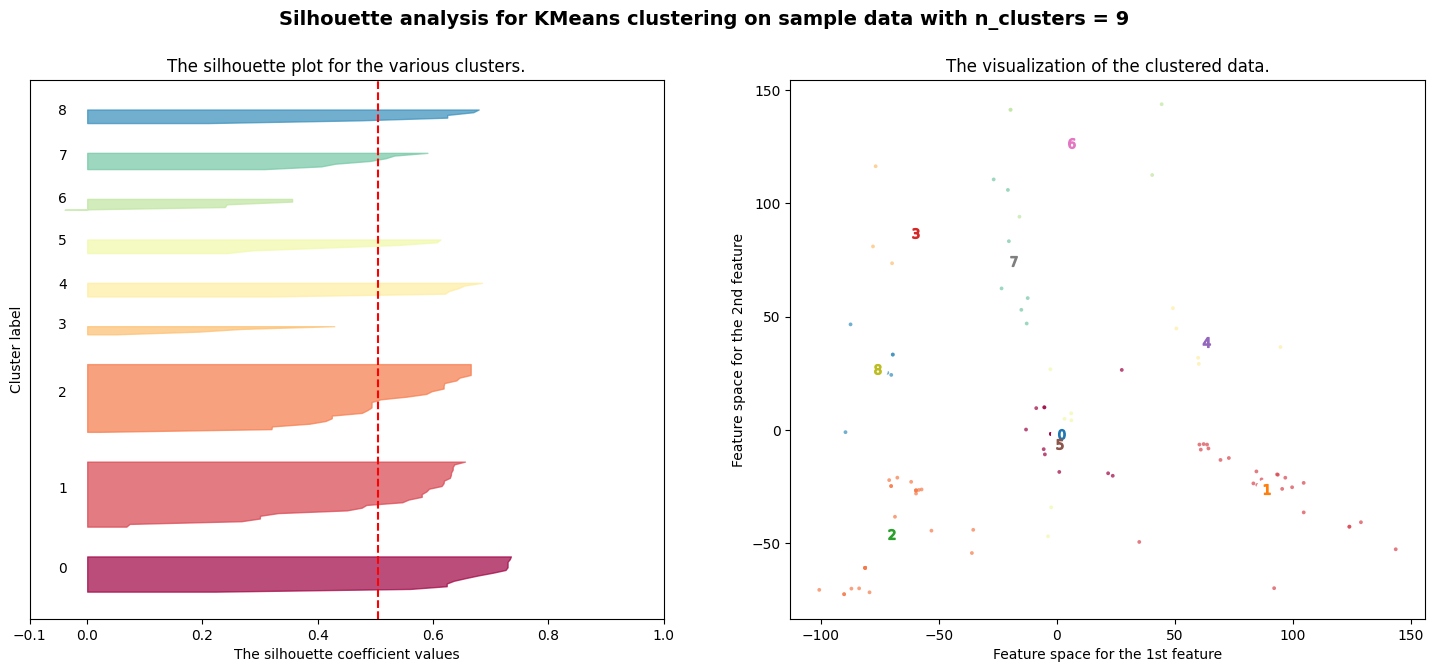

For n_clusters = 10 The average silhouette_score is : 0.5324535724640803


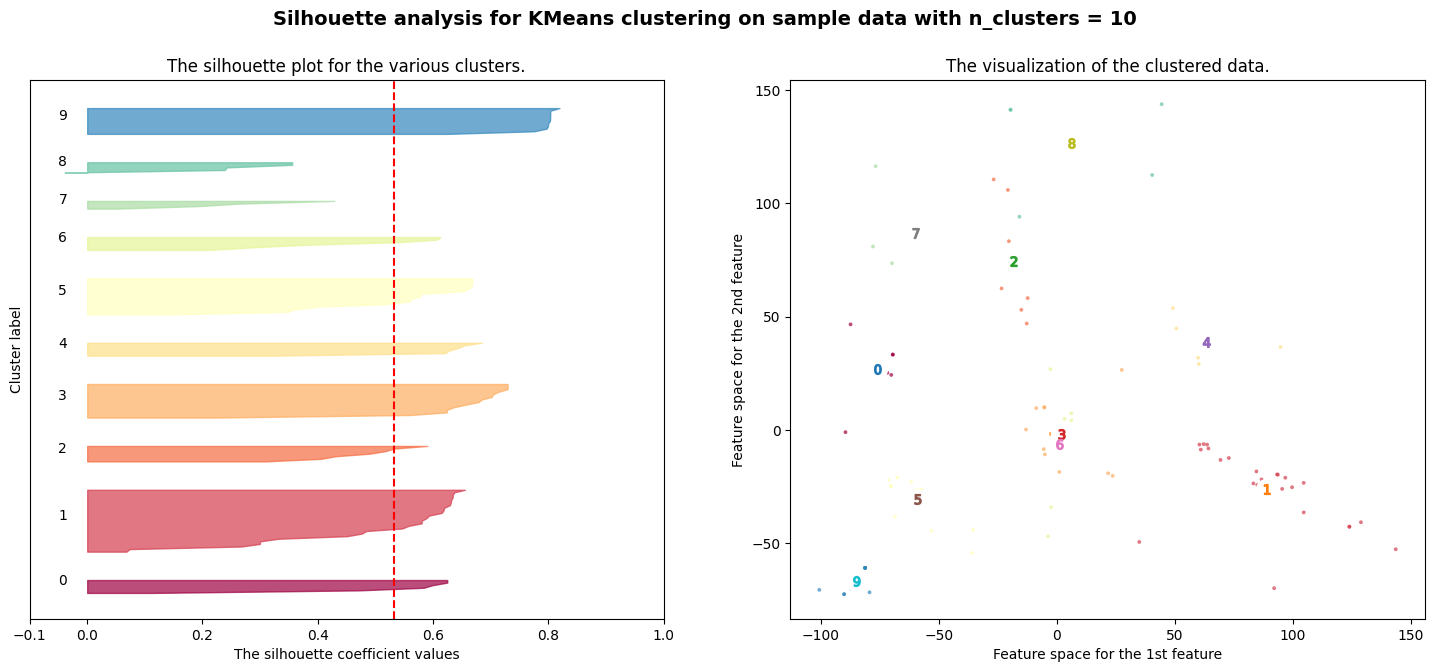

In [ ]:
#  performing silhouette analysis for different numbers of clusters

# define the range of clusters
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(dummy_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,n_init=5)
    cluster_labels = clusterer.fit_predict(dummy_pca)

    # displays the average silhouette score, which gives an indication of how well-separated the clusters are.
    silhouette_avg = silhouette_score(dummy_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummy_pca, cluster_labels)
  #  setting the starting y-coordinate for plotting the silhouette coefficients for each cluster as 10
    y_lower = 10
    for i in range(n_clusters):
        # extracts the silhouette coefficients of the data points belonging to that cluster and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()


        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i   #  calculates the y_upper variable, which represents the ending y-coordinate for plotting the silhouette coefficients

        #
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # increments the y_lower variable
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # sets the x-axis ticks

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)  # generates a colormap
    ax2.scatter(dummy_pca[:, 0], dummy_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,     #creates a scatter plot
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw green circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    #scatter plot markers are added to represent the cluster centers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

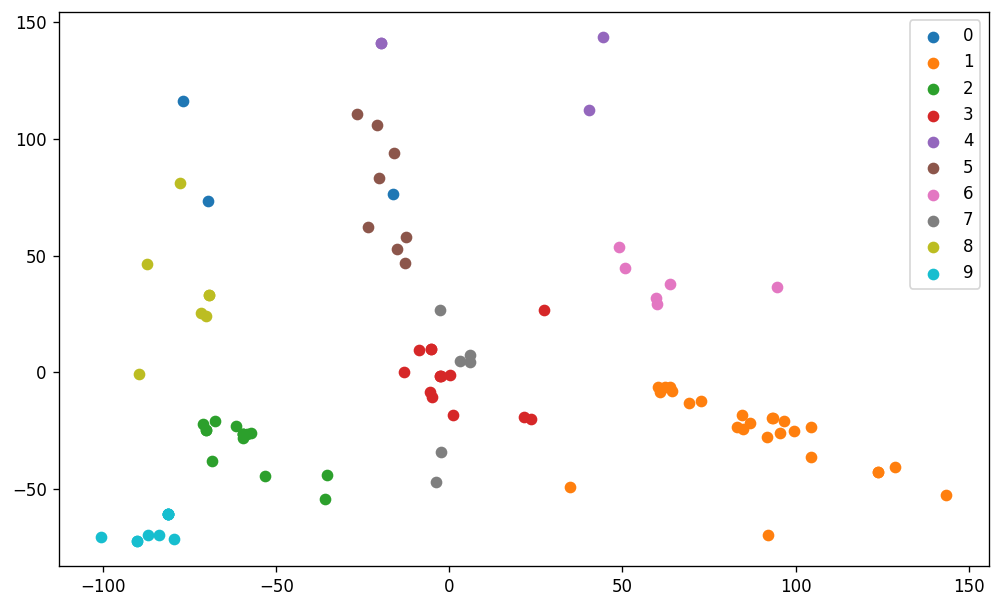

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

# initializes a KMeans clustering model with 10 clusters
kmeans= KMeans(n_clusters = 10, n_init= 5, random_state = 42)
kmeans.fit(dummy_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(dummy_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(dummy_pca[label == i , 0] , dummy_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#making df for pca
kmeans_pca_df = pd.DataFrame(dummy_pca,columns=['PC1','PC2','PC3'],index=dummy_scaled.index)

# adds a new column "label" to the DataFrame and stores the cluster labels
kmeans_pca_df["label"] = label

# randomly samples 2 rows from the DataFrame
kmeans_pca_df.sample(2)

PC1        PC2       PC3  label
Restaurant                                          
Faasos         92.013499 -69.710441 -1.906378      1
Mathura Vilas -70.221197 -24.703055 -6.397013      2

In [ ]:
#sets the index of the DataFrame dummy to the 'Restaurant' column
dummy.set_index(['Restaurant'],inplace=True)

#joins the 'label' column to the DataFrame dummy
dummy = dummy.join(kmeans_pca_df['label'])
dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                                  
Urban Asia - Kitchen & Bar  7.003974           3.650                    5   
Prism Club & Kitchen        7.090910           4.215                    4   

                            Cuisines_American  Cuisines_Andhra  \
Restaurant                                                       
Urban Asia - Kitchen & Bar                  0                0   
Prism Club & Kitchen                        0                0   

                            Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  \
Restaurant                                                                   
Urban Asia - Kitchen & Bar                 0             100             0   
Prism Club & Kitchen                       0               0             0   

                            Cuisines_Bakery  Cuisines_Beverages  ...  \
Restaurant                                                       ...   
Urban Asia - Kitchen & Bar                0                   0  ...   
Prism Club & Kitchen                      0                   0  ...   

                            Cuisines_Pizza  Cuisines_Salad  Cuisines_Seafood  \
Restaurant                                                                     
Urban Asia - Kitchen & Bar               0               0                 0   
Prism Club & Kitchen                     0               0                 0   

                            Cuisines_South Indian  Cuisines_Spanish  \
Restaurant                                                            
Urban Asia - Kitchen & Bar                      0                 0   
Prism Club & Kitchen                            0                 0   

                            Cuisines_Street Food  Cuisines_Sushi  \
Restaurant                                                         
Urban Asia - Kitchen & Bar                     0             100   
Prism Club & Kitchen                           0               0   

                            Cuisines_Thai  Cuisines_Wraps  label  
Restaurant                                                        
Urban Asia - Kitchen & Bar            100               0      7  
Prism Club & Kitchen                    0               0      5  

[2 rows x 46 columns]

In [ ]:
#changing back cost value to original from log1p done during transformation
dummy['Cost'] = np.expm1(dummy['Cost'])
dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                      
Biryanis And More  500.0            3.74                    3   
Beyond Flavours    800.0            4.28                    6   

                   Cuisines_American  Cuisines_Andhra  Cuisines_Arabian  \
Restaurant                                                                
Biryanis And More                  0                0                 0   
Beyond Flavours                    0                0                 0   

                   Cuisines_Asian  Cuisines_BBQ  Cuisines_Bakery  \
Restaurant                                                         
Biryanis And More               0             0                0   
Beyond Flavours                 0             0                0   

                   Cuisines_Beverages  ...  Cuisines_Pizza  Cuisines_Salad  \
Restaurant                             ...                                   
Biryanis And More                   0  ...               0               0   
Beyond Flavours                     0  ...               0               0   

                   Cuisines_Seafood  Cuisines_South Indian  Cuisines_Spanish  \
Restaurant                                                                     
Biryanis And More                 0                      0                 0   
Beyond Flavours                   0                    100                 0   

                   Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  \
Restaurant                                                               
Biryanis And More                     0               0              0   
Beyond Flavours                       0               0              0   

                   Cuisines_Wraps  label  
Restaurant                                
Biryanis And More               0      9  
Beyond Flavours                 0      8  

[2 rows x 46 columns]

In [ ]:
#creating df to store cluster data
clustering_result = dummy.copy().reset_index()

# merging two dataframes based on Restaurant column
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()


Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0            4.28   
1                     Biryani, North Indian, Chinese   800.0            4.70   
2       Asian, Mediterranean, North Indian, Desserts  1300.0            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0            3.21   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   

   Total_Cuisine_Count  label  
0                    6      8  
1                    3      9  
2                    4      3  
3                    5      9  
4                    5      0

In [ ]:
# Counting content in each cluster
cluster_count = dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values('Total_Restaurant')

# sorting based on the number of total restaurants in the cluster
cluster_count.sort_values('Total_Restaurant',ascending=False)

label  Total_Restaurant
0      1                25
1      2                15
2      3                14
3      9                11
4      5                 8
5      8                 7
6      7                 6
7      6                 6
8      4                 4
9      0                 3

In [ ]:
#creating new df for checking cuising in each cluster
new_cluster_df = clustering_result.copy()

# creates a list of cuisine types
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')

# creating multiple rows each corresponding  to a single cuisine type
new_cluster_df = new_cluster_df.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  Average_Rating  \
1                Paradise  North Indian   800.0            4.70   
47         Udipi's Upahar  South Indian   500.0            4.03   
40         Karachi Bakery     Fast Food   500.0            3.80   
5   The Fisherman's Wharf          Goan  1500.0            4.22   
97               Triptify  North Indian   400.0            3.55   

    Total_Cuisine_Count  label  
1                     3      9  
47                    3      2  
40                    3      1  
5                     5      5  
97                    1      3

In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print()

Cuisine List for Cluster : 8 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Mexican' 'Italian' 'Salad' 'Biryani'] 


Cuisine List for Cluster : 9 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'South Indian'
 'Andhra' 'Mughlai' 'Hyderabadi'] 


Cuisine List for Cluster : 3 

['Asian' 'Mediterranean' 'North Indian' 'Desserts' 'Street Food'
 'Fast Food' 'Kebab' 'BBQ' 'European' 'Hyderabadi' 'Mughlai' 'Beverages'
 'South Indian' 'Burger'] 


Cuisine List for Cluster : 0 

['Asian' 'Continental' 'North Indian' 'Chinese' 'Mediterranean' 'Italian'] 


Cuisine List for Cluster : 5 

['Seafood' 'Goan' 'North Indian' 'Continental' 'Asian' 'Healthy Food'
 'South Indian' 'Italian' 'Finger Food' 'Japanese' 'Salad' 'Sushi' 'Kebab'] 


Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'Burger' 'Fast Food' 'American'
 'Mughlai' 'Biryani' 'Bakery' 'Cafe' 'Wraps' 'Beverages' 'Momos' 'Salad'
 'Pizza' 'Street Food' 'Arabian' 'North Eastern'] 




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
new_dummy=dummy.copy()

In [ ]:
# dropping the total number of cuisines feature
new_dummy.drop('Total_Cuisine_Count',inplace=True,axis=1)

In [ ]:
# compute the sum of all numeric columns for each cluster
results_df_grouped=new_dummy.groupby('label').sum()

#computes the mean of the 'Cost' and 'Average_Rating' columns for each cluster.
results_df_grouped[['Cost','Average_Rating']] = new_dummy[['Cost','Average_Rating','label']].groupby('label').mean()
results_df_grouped

Cost  Average_Rating  Cuisines_American  Cuisines_Andhra  \
label                                                                    
0      1733.333333        3.690000                  0                0   
1       506.000000        3.556561                377                0   
2       736.666667        3.286145                100              200   
3       928.571429        3.802857                  0                0   
4      1675.000000        3.980000                  0                0   
5      1300.000000        3.783125                  0                0   
6      1125.000000        3.841275                  0                0   
7       850.000000        3.545833                100                0   
8      1135.714286        3.743240                  0                0   
9       681.818182        3.422397                  0              300   

       Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  Cuisines_Bakery  \
label                                                                    
0                     0             200             0                0   
1                   100               0             0              500   
2                   100               0             0              100   
3                     0             100           100                0   
4                     0             300             0                0   
5                     0             200             0                0   
6                     0             300           100                0   
7                     0             300             0                0   
8                     0               0             0                0   
9                     0               0             0                0   

       Cuisines_Beverages  Cuisines_Biryani  ...  Cuisines_North Indian  \
label                                        ...                          
0                       0                 0  ...                    200   
1                     300               200  ...                      0   
2                       0               100  ...                   1497   
3                     100                 0  ...                   1400   
4                       0                 0  ...                    200   
5                       0                 0  ...                    800   
6                       0                 0  ...                      0   
7                       0                 0  ...                      0   
8                       0                99  ...                    699   
9                     100              1099  ...                   1099   

       Cuisines_Pizza  Cuisines_Salad  Cuisines_Seafood  \
label                                                     
0                   0               0                 0   
1                  99              77                 0   
2                   0               0                 0   
3                   0               0                 0   
4                   0               0                 0   
5                   0             100               100   
6                   0               0                 0   
7                   0               0               100   
8                   0             200                 0   
9                   0               0               199   

       Cuisines_South Indian  Cuisines_Spanish  Cuisines_Street Food  \
label                                                                  
0                          0                 0                     0   
1                          0                 0                   100   
2                        300                 0                     0   
3                        100                 0                   100   
4                          0               100                     0   
5                        200                 0                     0   
6                          0                 0    

###Cuisine Distribution Across Clusters

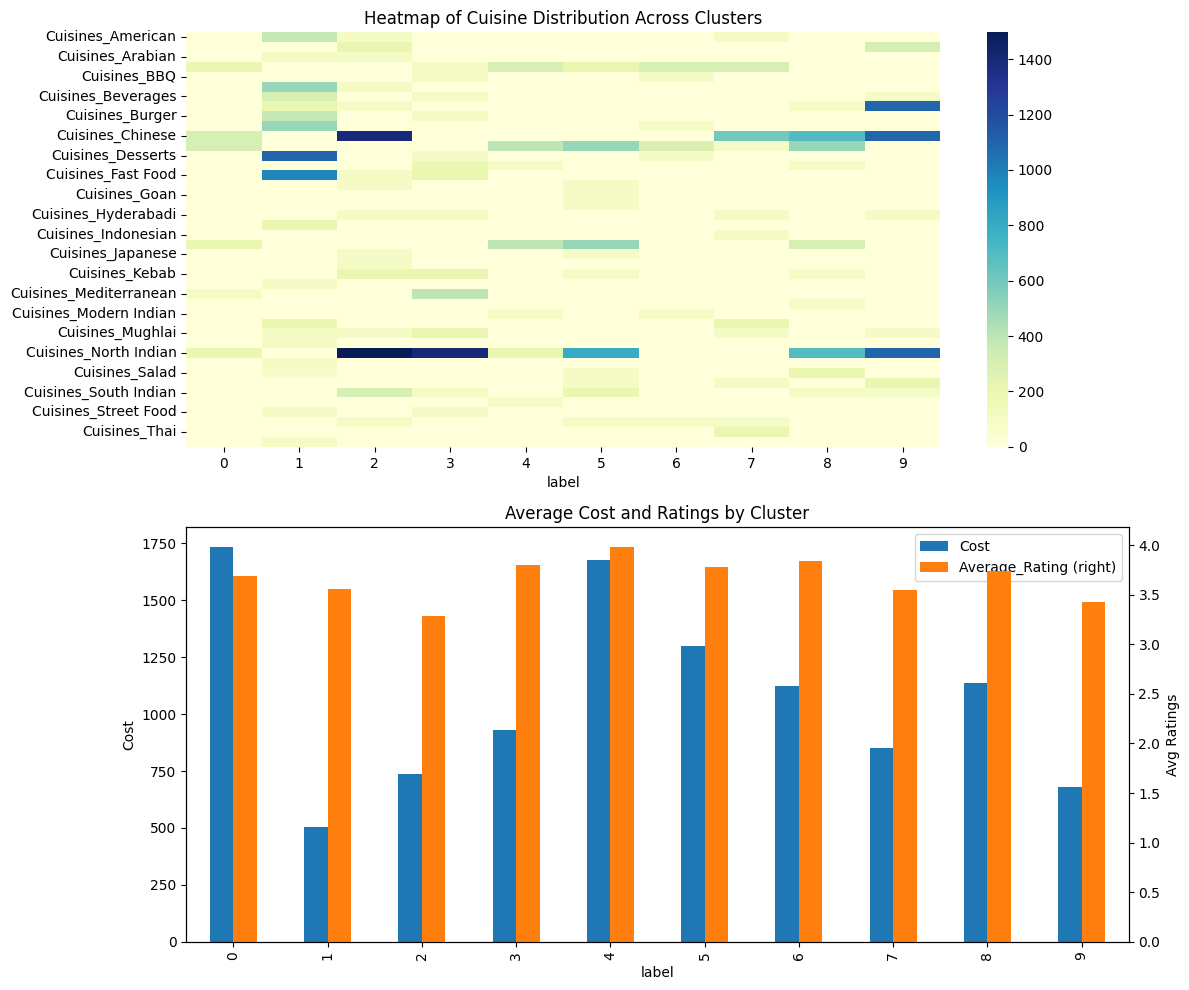

In [ ]:
# Visualizing evaluation Metric Score chart

# Preparing the data for heatmap
cuisine_data = results_df_grouped.drop(['Cost', 'Average_Rating'], axis=1)
cost_ratings_data = results_df_grouped[['Cost', 'Average_Rating']]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Heatmap for cuisine distribution
sns.heatmap(cuisine_data.T, cmap="YlGnBu", ax=ax[0])  # Transposing for better layout
ax[0].set_title('Heatmap of Cuisine Distribution Across Clusters')

# Grouped bar chart for cost and ratings
cost_ratings_data.plot(kind='bar', ax=ax[1], secondary_y='Average_Rating')
ax[1].set_title('Average Cost and Ratings by Cluster')
ax[1].set_ylabel('Cost')
ax[1].right_ax.set_ylabel('Avg Ratings')

plt.tight_layout()
plt.show()


###Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled

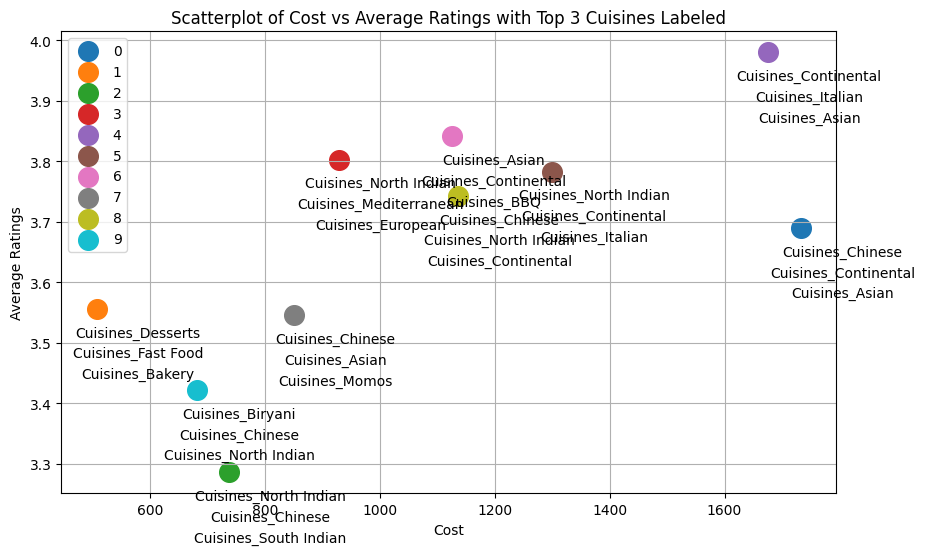

In [ ]:
# resets the index
df = results_df_grouped.reset_index()

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(row['Cost'], row['Average_Rating'],s=200, label=f"{int(row['label'])}")

    # extracts the top 3 cuisines for the current cluster by dropping the 'label', 'Cost' and 'Average_Rating' columns and selecting the largest 3 values
    top_cuisines = row.drop(['label', 'Cost', 'Average_Rating']).nlargest(3)
    i = 0
    for cuisine, value in top_cuisines.items():
        if value > 0:  # if the value is greater than 0 annotates the scatter plot with the cuisine name
            plt.annotate(cuisine, (row['Cost'], row['Average_Rating']), textcoords="offset points", xytext=(30,-20-i*15), ha='center')
            i+=1
plt.xlabel('Cost')
plt.ylabel('Average Ratings')
plt.title('Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled')
plt.legend()
plt.grid(True)
plt.show()

K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it.Here K-means clustering method is used.  Both the Elbow and Silhuoette Methods are used to get an efficient number of K, and we discovered that n clusters = 10 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.
The highest average rating of 4 was given to the cuisines continental,Italian and Asian in cluster 4. For clusters 2 and 3 North Indian food is mostly demanding.

#### 2. Cross- Validation & Hyperparameter Tuning

Hyper tuning is not required

### ML Model - 2

**Sentiment analysis**

In [ ]:
#defining function to calculate score


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)   #fitting the model using the training data
    y_pred = model.predict(X_test)  #predicts the target variable using the trained model and the test features
    roc_auc = roc_auc_score(y_test, y_pred)     # calculates the ROC AUC score
    precision = precision_score(y_test, y_pred) # calculates the precision score
    recall = recall_score(y_test, y_pred)       # calculates the recall score
    f1 = f1_score(y_test, y_pred)               # calculates the f1 score
    accuracy = accuracy_score(y_test, y_pred)   # calculates the accuracy score


    # Get the confusion matrix for both train and test
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')   #plotting the confusion matrix

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2. #calculates a threshold value for deciding the text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],                    #adds text annotations to the confusion matrix plot
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Logistic Regression**

In [ ]:
# Model Training

# initialzing the logistic regression model
model1 = LogisticRegression()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**XgBoost**

In [ ]:
# initialzing the XGBClassifier
model2 = XGBClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**RandomForestClassifier**

In [ ]:
# initialzing the RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



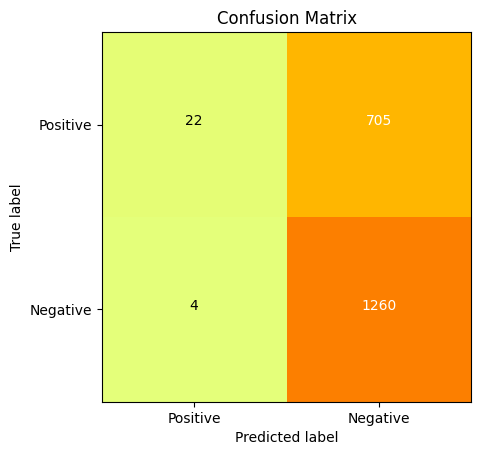

[[  22  705]
 [   4 1260]]
Metric        Score
---------  --------
ROC AUC    0.513548
Precision  0.641221
Recall     0.996835
F1         0.780427
Accuracy   0.643898


In [ ]:
# plotting the evaluation metrics
print_table(model, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).
The Precision is 64%,F1Score is 78 and accuracy is 64%.

**XgBoost**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



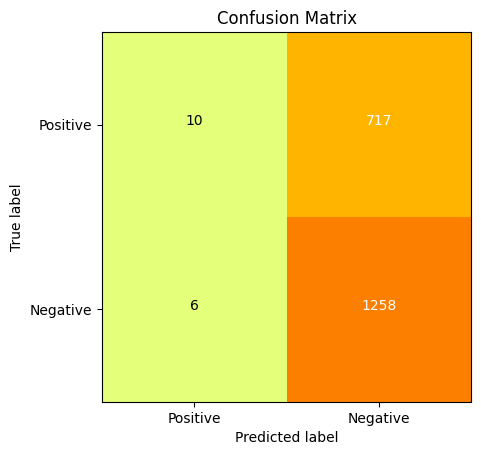

[[  10  717]
 [   6 1258]]
Metric        Score
---------  --------
ROC AUC    0.504504
Precision  0.636962
Recall     0.995253
F1         0.776783
Accuracy   0.636866


In [ ]:
# plotting the evaluation metrics
print_table(model2, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

 The Precision is 63%,F1Score is 77 and accuracy is 63.6%.

**RandomForestClassifier**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



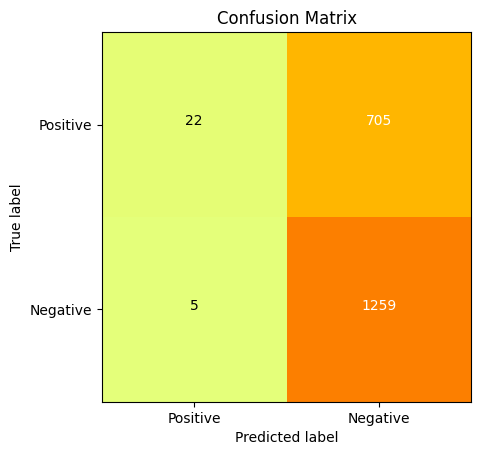

[[  22  705]
 [   5 1259]]
Metric        Score
---------  --------
ROC AUC    0.513153
Precision  0.641039
Recall     0.996044
F1         0.78005
Accuracy   0.643395


In [ ]:
# plotting the evaluation metrics
print_table(model3, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

The Precision is 64%,F1Score is 78 and accuracy is 64%.

#### 2. Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [ ]:
# hyperparameter tuning using GridSearchCV

# defines the grid of hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.6438975389251632


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



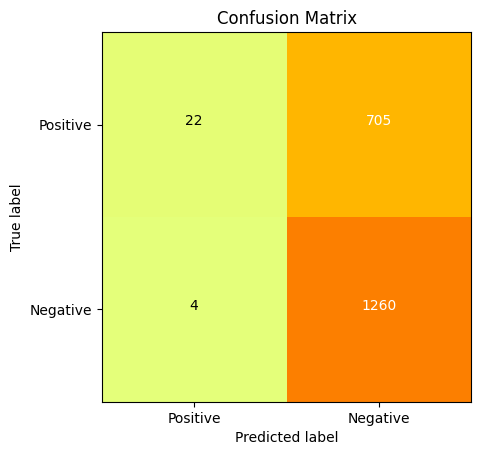

[[  22  705]
 [   4 1260]]
Metric        Score
---------  --------
ROC AUC    0.513548
Precision  0.641221
Recall     0.996835
F1         0.780427
Accuracy   0.643898


In [ ]:
# plotting the evaluation metrics
print_table(grid_search, X_train, y_train, X_test, y_test)

The precision is 64%, F1 score is 78 and accuracy is 64%.There is no change in accuracy after tuning.

**XgBoost**

In [ ]:
# defines the grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage used in boosting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Instantiate GridSearchCV
xg_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search
xg_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", xg_search.best_params_)
print("Best score:", xg_search.best_score_)

# Get best estimator
best_xgb = xg_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.6307129297307219
Accuracy: 0.6373681567051733


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



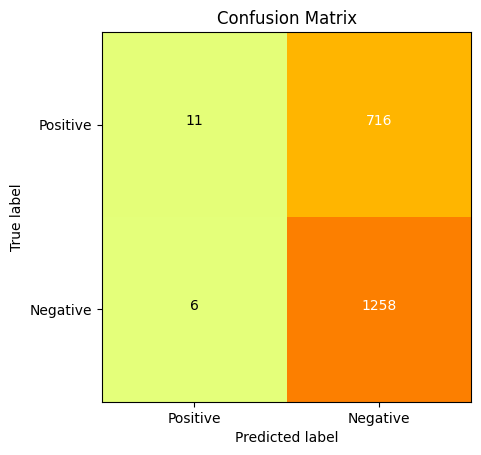

[[  11  716]
 [   6 1258]]
Metric        Score
---------  --------
ROC AUC    0.505192
Precision  0.637285
Recall     0.995253
F1         0.777023
Accuracy   0.637368


In [ ]:
# plotting the evaluation metrics
print_table(xg_search, X_train, y_train, X_test, y_test)

The Precision is 63%,F1Score is 77.7 and accuracy is 63.73%.The accuracy has slightly increased.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: Dep

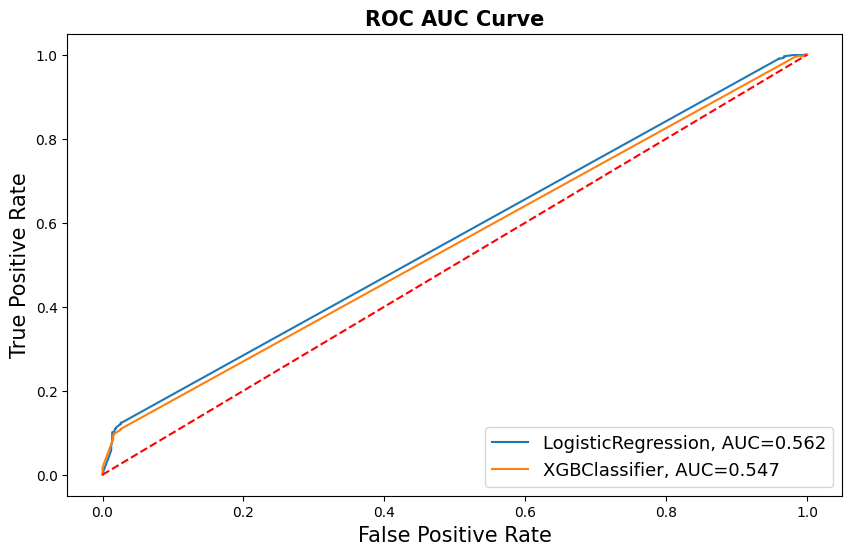

In [ ]:
#Plotting graph ROC AUC curve

# predicting the sentiment by all models
y_preds_proba_lr = best_model.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = best_xgb.predict_proba(X_test)[::,1]

# Define Classifiers and Probabilities
classifiers_proba = [(best_model, y_preds_proba_lr),
                    (best_xgb, y_preds_proba_xgbc)
                  ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])   #calculates the False Positive Rate (FPR) and True Positive Rate (TPR) for each classifier
    auc = roc_auc_score(y_test, pair[1])        #calculates the AUC score

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,     #appends to the result_table
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for finding the optimal hyperparameters.
our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall for XgBoost Classifier there is a improvement. The accuracy has a slight increase from 63.6 to  63.73%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

 Used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The Logistic Regression can be considered as a good model comapared to Xg Boost for the business, especially when it achieves slightly high score in all of these evaluation metrics.This is a good model which can accurately predict outcomes.It can be again hyper tuned for better scores.

### Visualization of sentiment analysis

In [ ]:
# filtering reviews into positive and negative
pos_rev = review[review.Rating>= 3]
neg_rev = review[review.Rating< 3]

In [ ]:
# list of negative reviews

#Creates a list of lists containing words from each sentence
def build_corpus(data):
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")  # splits each sentence into words
            corpus.append(word_list)            #appends words to the corpus list

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)
corpus[0:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['We',
  'ordered',
  'corn',
  'cheese',
  'balls,',
  'manchow',
  'soup',
  'and',
  'paneer',
  'shashlik',
  'sizzler.',
  'The',
  'sizzler',
  'was',
  'stale.',
  'Paneer',
  'was',
  'smelling',
  'and',
  'the',
  'waiter',
  'was',
  'so',
  'impolite',
  'to',
  'even',
  'accept',
  'the',
  'mistake.',
  'Never',
  'going',
  'again'],
 ['we',
  'went',
  'for',
  'a',
  'team',
  'lunch,',
  'such',
  'a',
  'worst',
  'restaurant..',
  'food',
  'was',
  'tasteless,',
  'service',
  'was',
  'very',
  'slow',
  'and',
  'Ac',
  'was',
  'not',
  'working.',
  'We’ve',
  'requested',
  'them',
  'multiple',
  'times',
  'but',
  'its',
  'of',
  'no',
  'use.',
  'Please',
  'don’t',
  'waste',
  'your',
  'money',
  'and',
  'I',
  'strictly',
  'recommend',
  'not',
  'to',
  'prefer',
  'beyond',
  'flavours,']]

In [ ]:
# list of postive reviews

# Display the first two elements of the positive corpus list
corpus = build_corpus(pos_rev)
corpus[0:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['The',
  'ambience',
  'was',
  'good,',
  'food',
  'was',
  'quite',
  'good',
  '.',
  'had',
  'Saturday',
  'lunch',
  ',',
  'which',
  'was',
  'cost',
  'effective',
  '.\nGood',
  'place',
  'for',
  'a',
  'sate',
  'brunch.',
  'One',
  'can',
  'also',
  'chill',
  'with',
  'friends',
  'and',
  'or',
  'parents.\nWaiter',
  'Soumen',
  'Das',
  'was',
  'really',
  'courteous',
  'and',
  'helpful.'],
 ['Ambience',
  'is',
  'too',
  'good',
  'for',
  'a',
  'pleasant',
  'evening.',
  'Service',
  'is',
  'very',
  'prompt.',
  'Food',
  'is',
  'good.',
  'Over',
  'all',
  'a',
  'good',
  'experience.',
  'Soumen',
  'Das',
  '-',
  'kudos',
  'to',
  'the',
  'service']]

In [ ]:
# implementing Latent Dirichlet Allocation (LDA) for topic modeling using Gensim

# Tokenize the documents using the simple_preprocess function
tokenized_docs = [simple_preprocess(doc) for doc in review['Review']]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train an LDA model on the bag-of-words corpus
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top 10 terms
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([term[0] for term in topic[1]])))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 0: makhni, eggs, dal, ok, explore, scrambled, oily, school, chawal, international
Topic 1: the, was, we, and, for, to, were, service, us, had
Topic 2: delivery, momos, time, delivered, on, late, good, she, fast, her
Topic 3: the, place, is, to, and, it, on, for, you, of
Topic 4: was, paratha, paneer, ordered, packing, parathas, packaging, aloo, order, not
Topic 5: chocolate, cake, donuts, cakes, brownie, shakes, love, cookies, company, are
Topic 6: and, good, is, food, place, the, very, service, to, for
Topic 7: the, to, not, and, it, is, they, this, food, but
Topic 8: cream, ice, tea, less, super, choco, excellent, arena, creams, eleven
Topic 9: the, and, was, of, it, with, chicken, to, in, for


In [ ]:
# Create a function to get the subjectivity(refers to whether a piece of text expresses personal opinions, feelings, or beliefs)
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity  #eturns the subjectivity of the given text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Create a function to get the polarity(refers whether the sentiment is positive, negative, or neutral)
def polarity(text):
    return TextBlob(text).sentiment.polarity   #eturns the polarity of the given text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Applying subjectivity and the polarity function to the respective columns
review['Subjectivity'] = review['Review'].apply(subjectivity)
review['Polarity'] = review['Review'].apply(polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Checking for created columns
review['Polarity']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       0.660000
1       0.606667
2       0.540000
3       0.500000
4       0.577500
          ...   
9995    0.292500
9996    0.186174
9997    0.124535
9998    0.470000
9999    0.079861
Name: Polarity, Length: 9955, dtype: float64

In [ ]:
# Checking for created columns
review['Subjectivity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       0.720000
1       0.613333
2       0.740000
3       0.783333
4       0.570000
          ...   
9995    0.621000
9996    0.724242
9997    0.511157
9998    0.568571
9999    0.588194
Name: Subjectivity, Length: 9955, dtype: float64

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Apply get analysis function to return the sentiment analysis results corresponding to the polarity scores
review['Analysis'] = review['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# plot the polarity and subjectivity using scatter plot
fig = px.scatter(review,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [ ]:
# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The resulting plot can provide several insights into the sentiment analysis results. Firstly, the histogram bars on the left side of the plot (negative polarity) indicate that a significant number of reviews expressed negative sentiments. Similarly, the histogram bars on the right side of the plot (positive polarity) indicate that a significant number of reviews expressed positive sentiments.

Overall, this plot can provide a quick and easy way to visualize the sentiment polarity distribution of the reviews, which can help in understanding the overall sentiment of the customers towards the restaurants.

**Sentment prediction**

In [ ]:
# define a function preprocess to preprocesse the text data

# Initialize the WordNet lemmatizer and set of English stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Lemmatize and remove stopwords
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# predict the sentiment of a new sentence
new_sentence = "The movie was surprisingly good."

# applying the preprocess function
processed_new_sentence = preprocess(new_sentence)

# Vectorizing the Preprocessed Sentence
vectorized_new_sentence = vectorizer.transform([processed_new_sentence])

# Predicting the Sentiment
predicted_sentiment = model.predict(vectorized_new_sentence)

# labelling the sentiments
predicted_sentiment_label = 'positive' if predicted_sentiment[0] == 1 else 'negative'

predicted_sentiment_label


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'positive'

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.
Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.
F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.
Accuracy is the proportion of correctly classified instances among all instances.

For a positive business impact, F1-score can be considered as it balances the precision and recall to give an overall performance measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In this case Logistic Regression is the best model which is hyperparameter optimized.

The interpretability of Logistic Regression allows analysts to understand which words contribute positively or negatively to the sentiment of the text.

Logistic Regression is computationally efficient.This efficiency is particularly advantageous when dealing with large text datasets, making Logistic Regression suitable for sentiment analysis tasks with high volumes of data.

Its ability to scale to large feature spaces makes Logistic Regression suitable for sentiment analysis tasks with a vast vocabulary and numerous features.

Logistic Regression supports regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization, which help prevent overfitting by penalizing large coefficients.

Sentiment analysis tasks are often formulated as binary classification problems (e.g., positive vs. negative sentiment). Logistic Regression naturally fits this binary classification framework, making it well-suited for sentiment analysis tasks where the goal is to classify text into two sentiment classes.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
!pip install shap

# used for explaining the output of machine learning models
import shap


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



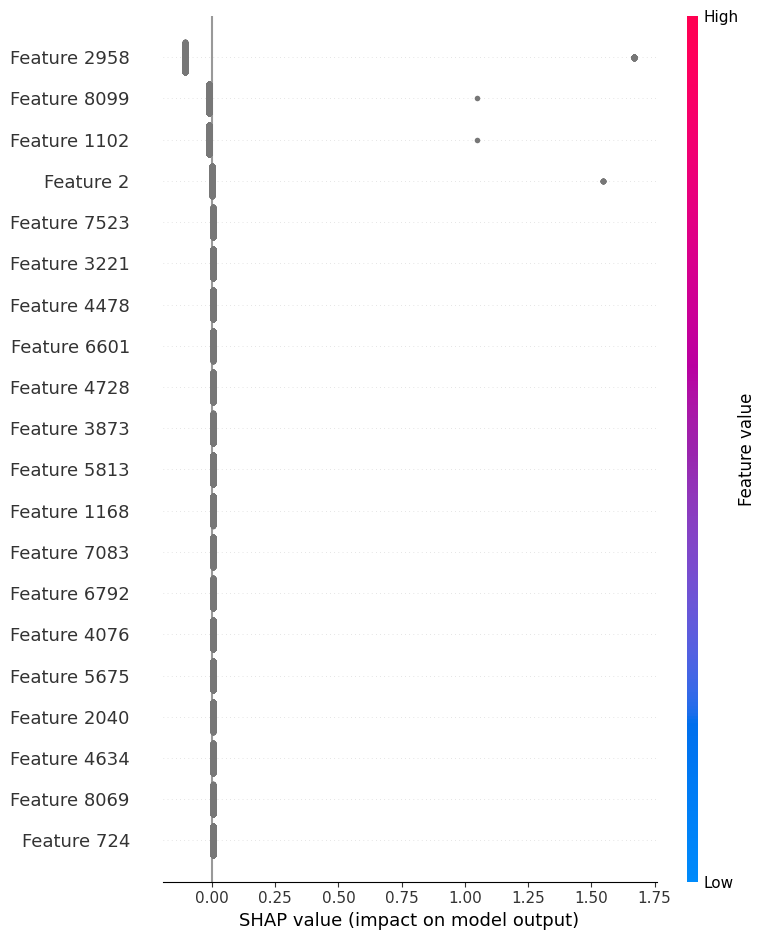

In [ ]:

# Initialize the SHAP explainer with the trained model and data
explainer = shap.Explainer(best_model, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)


X_test which was originally the text data, which was converted into numerical feature using different preprocessing steps. Here,we can see only some feature are important during prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group restaurants into 10 clusters.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved.

Other important discoveries during analysis are -

AB's - Absolute Barbecues, show maximum engagement as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

Restaurant Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant in the locality which has a price of 2800 for order. Hotels like Amul and Mohammedia Shawarma are the least expensive with price of 150.

North Indian food followed by Chinese are best or in demand food as sold by most of the restaurants.

Satwinder singh is the most followed reviewer and on an average he gives 3.5 rating.

Anvesh Chowdary is the top reviewer in terms of the number of reviews they have written.

Modern Indian cuisine is the top cuisine by average cost.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***